In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, accuracy_score, average_precision_score

from mk_doublets import sim_inflate, sim_avg, sim_sum

def get_dbl_metrics(test, score):
    fig = plt.figure(figsize=(6,3),dpi=100)

    plt.subplot(1,2,1)
    #ROC 
    fpr, tpr, thresholds = metrics.roc_curve(test, score, pos_label=1)
    rauc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr,lw=2, label='ROC curve (area = %0.2f)' % rauc)
    plt.plot([0,1],[0,1],'--',color ='black', lw=1)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC (area = %0.2f)' % rauc)

    plt.subplot(1,2,2)
    # precision recall curve
    precision, recall, thresholds = precision_recall_curve(test, score, pos_label=1)
    prauc = metrics.auc(recall, precision)
    plt.plot(recall, precision, lw=2)
    random=len(test[test==1]) / len(test)
    plt.plot([0, 1], [random, random], linestyle='--', label='random', c='black', lw=1)
    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.title("PR curve (area = %0.2f)" % prauc)

    plt.tight_layout()
    
    ap = average_precision_score(test, score)
    
    return rauc, prauc, ap

def mk_heatmap(hm, title = 'Heatmap'):
    fig, ax = plt.subplots(1, 1, dpi=300)
    #cbar_ax = fig.add_axes([.95, .25, .05, .5])
    cbar_kws = {"orientation":"horizontal", 
                "shrink":0.7,
                'extendfrac':0.1, 
                "drawedges":False,
               }

    #(hm.subtract(hm.min(axis=1), axis=0)).div((hm.max(axis=1) - hm.min(axis=1)), axis=0)
    
    ax=sns.heatmap(hm, square=False, ax=ax, cbar=True, cmap="YlOrRd", annot=(np.round(hm,2)*100).astype(int),  fmt='g')#, cbar_kws=cbar_kws) #YlOrRd
    ax.set_yticklabels(ax.get_yticklabels(),rotation=45)
    ax.set_title(title, fontsize=18)

def mk_heatmap(hm, title = 'Heatmap'):
    fig, ax = plt.subplots(1, 1, dpi=300)
    #cbar_ax = fig.add_axes([.95, .25, .05, .5])
    cbar_kws = {"orientation":"horizontal", 
                "shrink":0.7,
                'extendfrac':0.1, 
                "drawedges":False,
               }
    
    hm_norm = hm.rank(axis=1, method='max')
    #(hm.subtract(hm.min(axis=1), axis=0)).div((hm.max(axis=1) - hm.min(axis=1)), axis=0)
    
    ax=sns.heatmap(hm_norm, square=False, ax=ax, cbar=True, annot=hm, cmap="YlOrRd",  fmt='g')#, cbar_kws=cbar_kws) #YlOrRd
    ax.set_yticklabels(ax.get_yticklabels(),rotation=45)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_title(title, fontsize=18)

    plt.tight_layout()

2022-01-25 15:01:22.686086: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-25 15:01:22.686128: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import numpy as np
import scipy.sparse as scs
from scipy.stats import multinomial
import pathlib as pl
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import mmread

import umap as um


from os import listdir
from os.path import isfile, join
import os

import random

from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [56]:
PCs = np.arange(10,40,5)
#PCs = [5,10]

data_dir = 'sce_normalized_data_inflate'
path = '../data/' + data_dir + '/'
files = [f for f in listdir(path) if (isfile(join(path, f)) & (f[-18:-4] == 'real_logcounts'))]
files = np.sort(files)
#files = files[3:5]
files

array(['HEK-HMEC-MULTI_real_logcounts.mtx',
       'HMEC-orig-MULTI_real_logcounts.mtx',
       'HMEC-rep-MULTI_real_logcounts.mtx', 'J293t-dm_real_logcounts.mtx',
       'cline-ch_real_logcounts.mtx', 'hm-12k_real_logcounts.mtx',
       'hm-6k_real_logcounts.mtx', 'mkidney-ch_real_logcounts.mtx',
       'nuc-MULTI_real_logcounts.mtx', 'pbmc-1A-dm_real_logcounts.mtx',
       'pbmc-1B-dm_real_logcounts.mtx', 'pbmc-1C-dm_real_logcounts.mtx',
       'pbmc-2ctrl-dm_real_logcounts.mtx',
       'pbmc-2stim-dm_real_logcounts.mtx', 'pbmc-ch_real_logcounts.mtx',
       'pdx-MULTI_real_logcounts.mtx'], dtype='<U34')

HEK-HMEC-MULTI
../results_knn2/HEK-HMEC-MULTI_
loading in real mtx


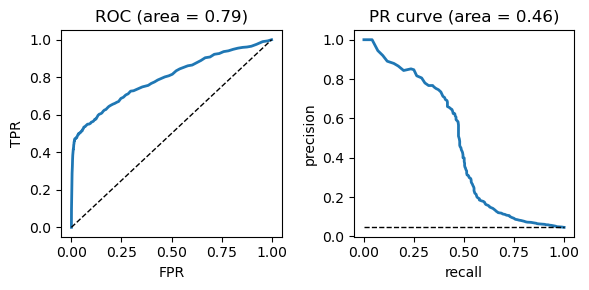

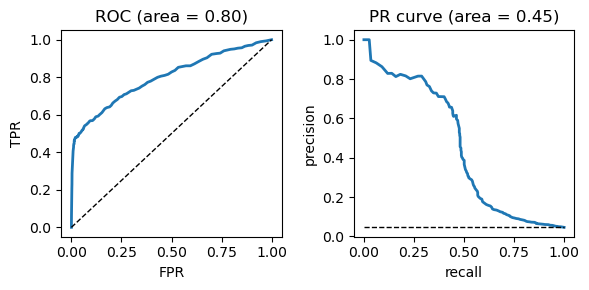

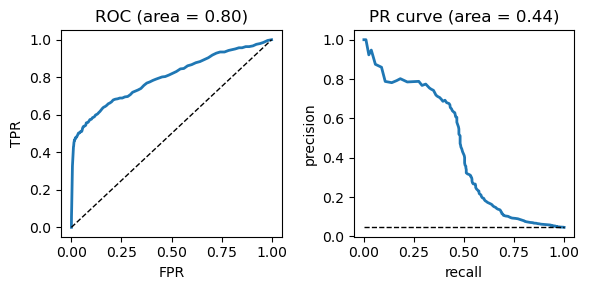

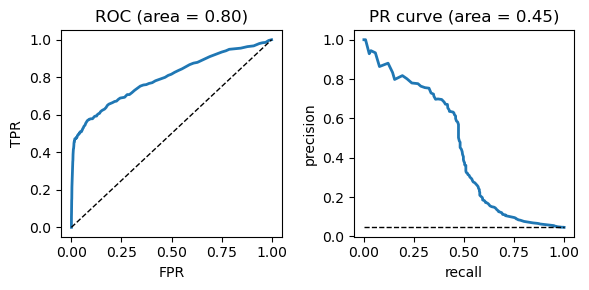

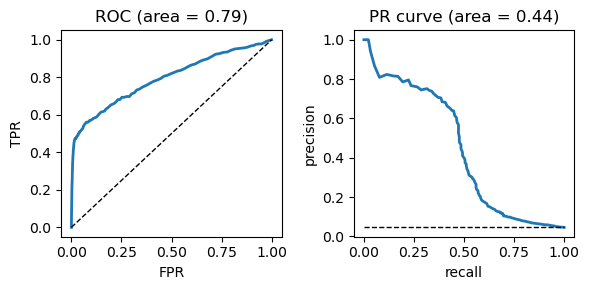

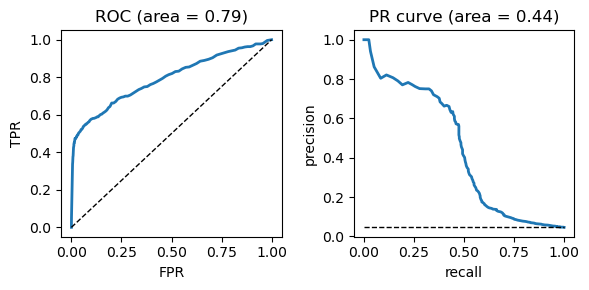

HMEC-orig-MULTI
../results_knn2/HMEC-orig-MULTI_
loading in real mtx


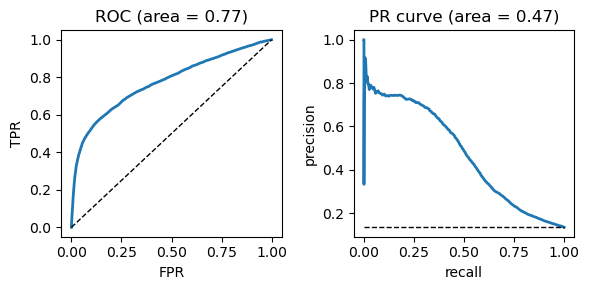

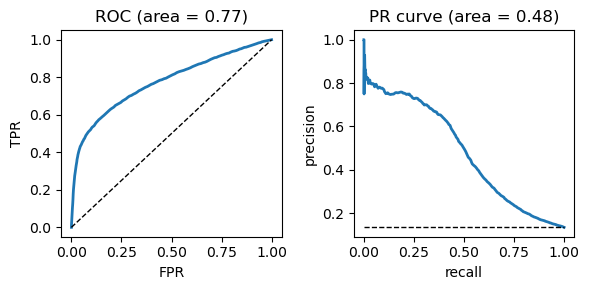

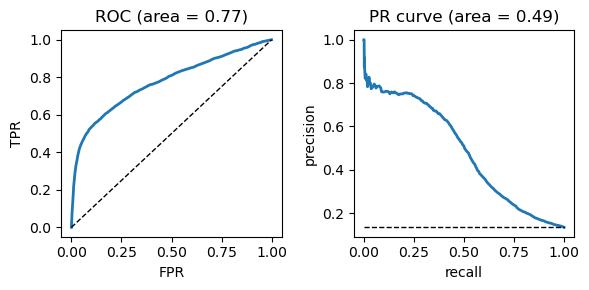

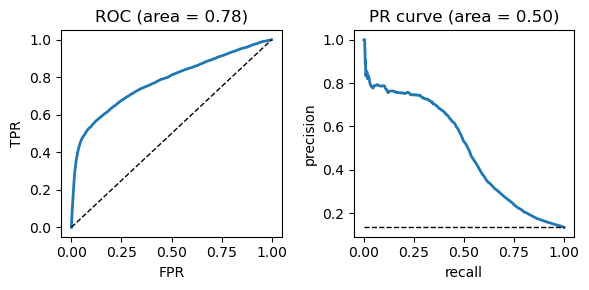

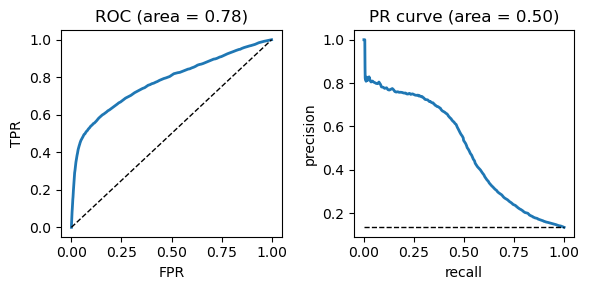

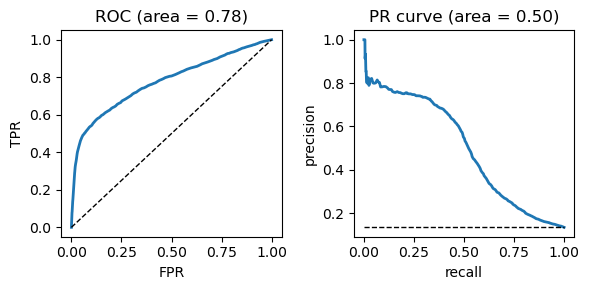

HMEC-rep-MULTI
../results_knn2/HMEC-rep-MULTI_
loading in real mtx


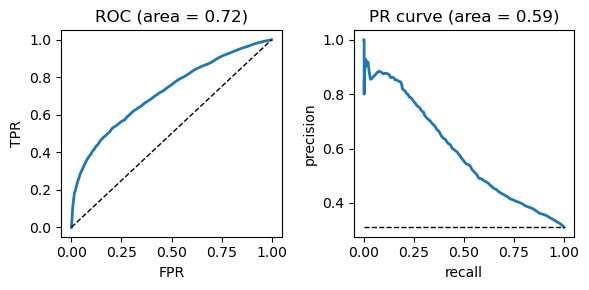

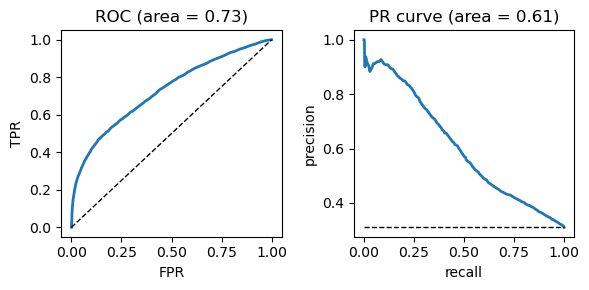

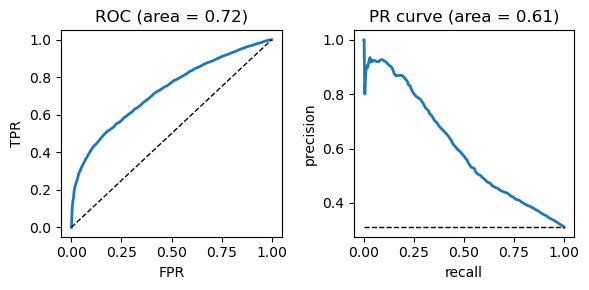

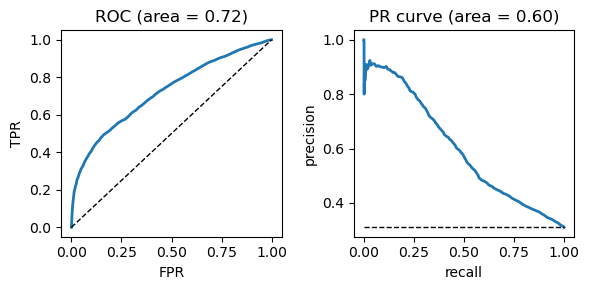

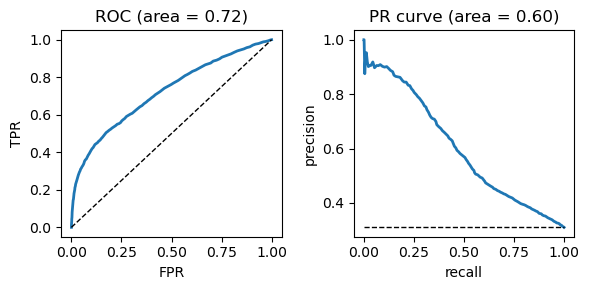

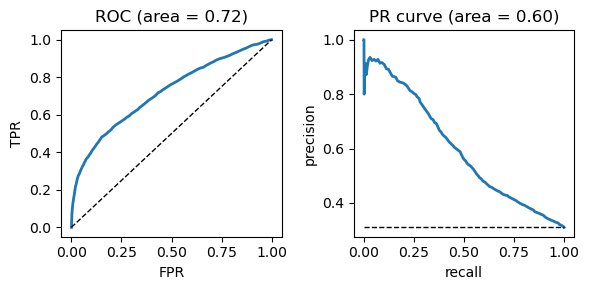

J293t-dm
../results_knn2/J293t-dm_
loading in real mtx


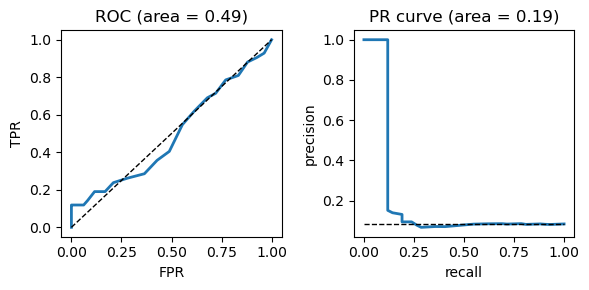

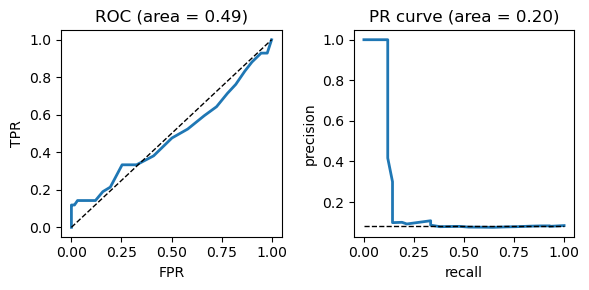

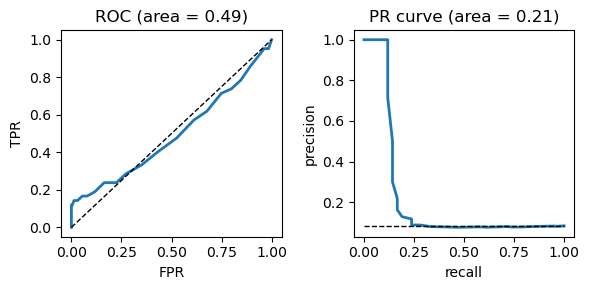

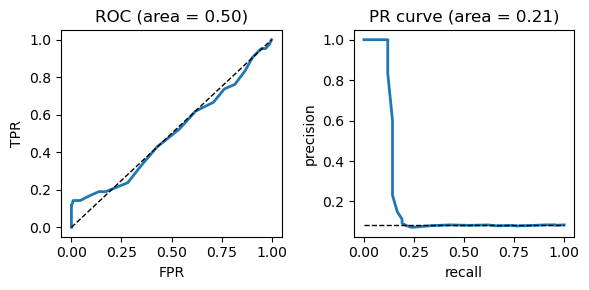

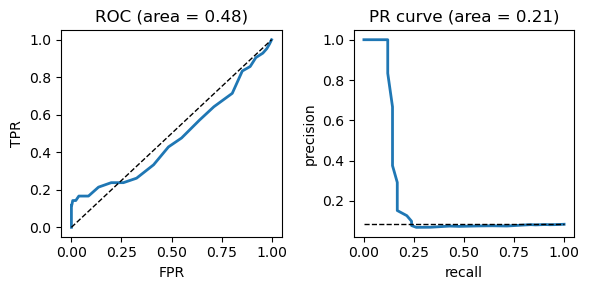

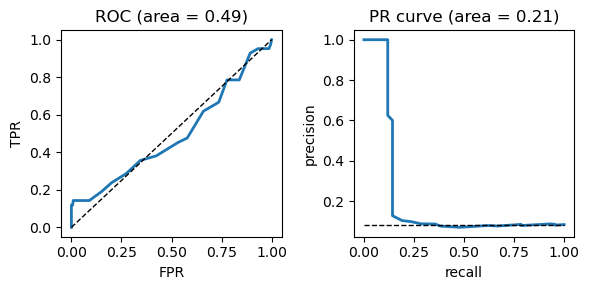

cline-ch
../results_knn2/cline-ch_
loading in real mtx


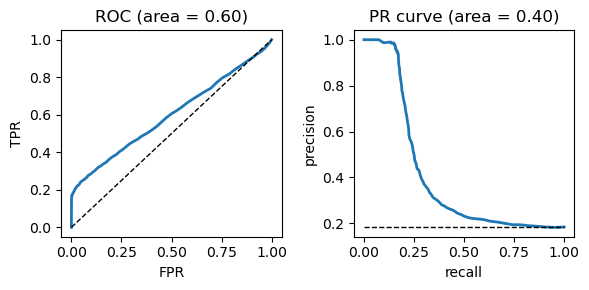

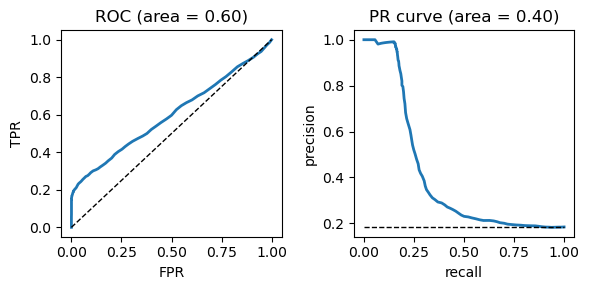

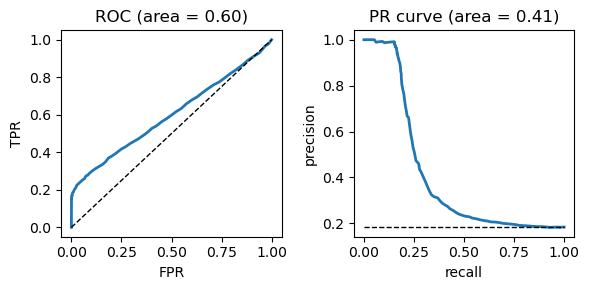

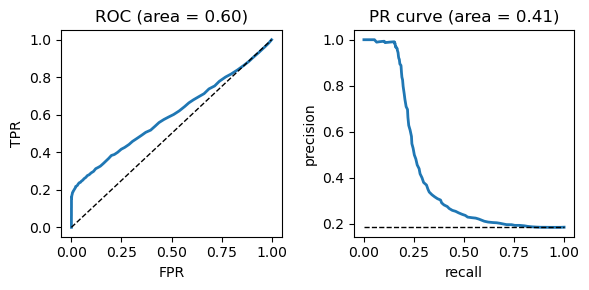

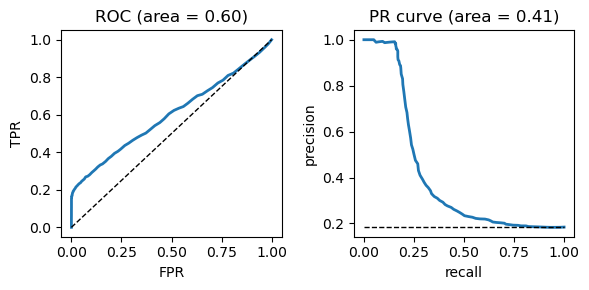

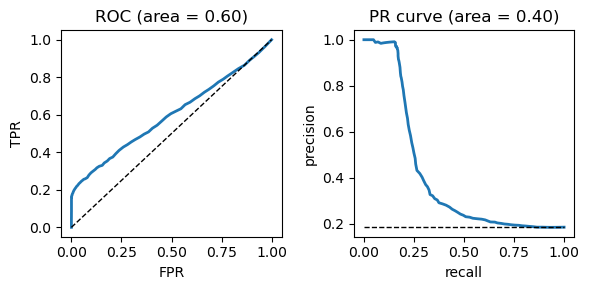

hm-12k
../results_knn2/hm-12k_
loading in real mtx


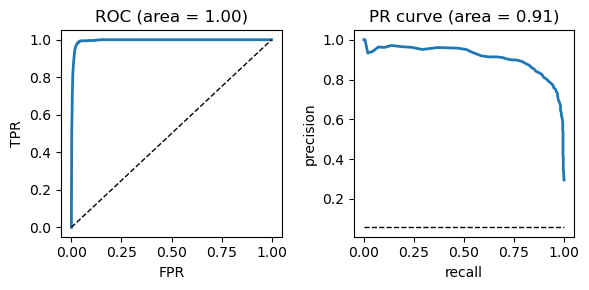

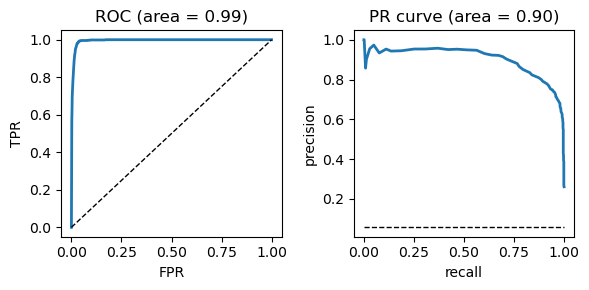

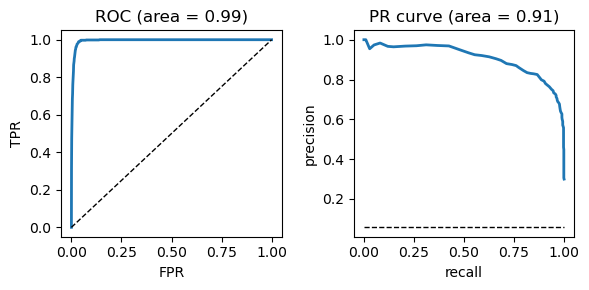

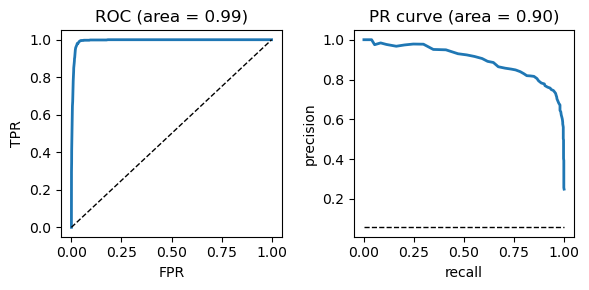

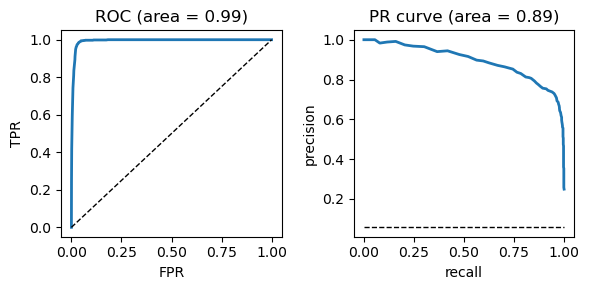

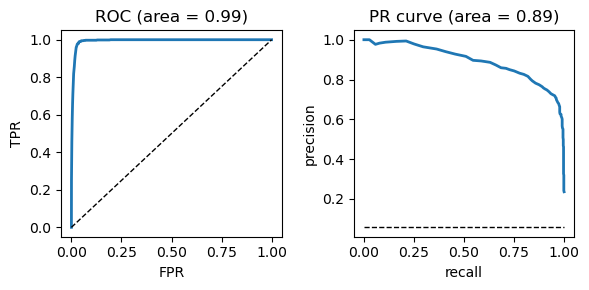

hm-6k
../results_knn2/hm-6k_
loading in real mtx


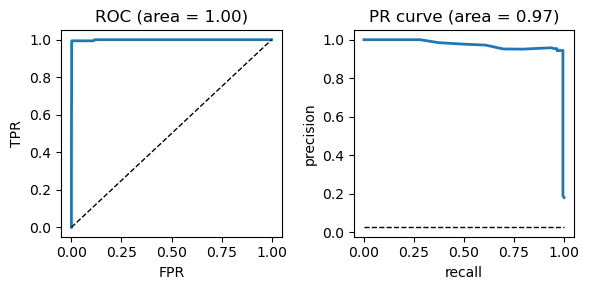

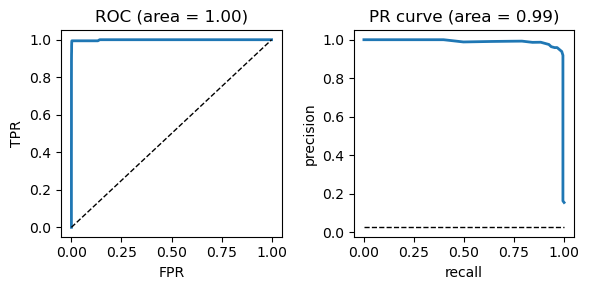

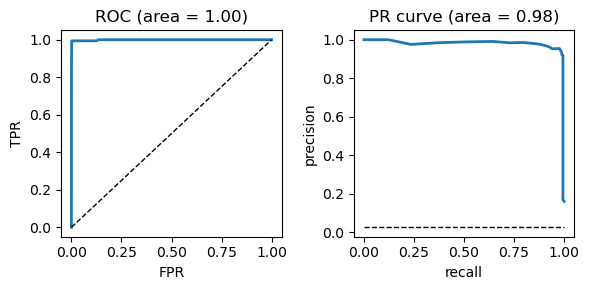

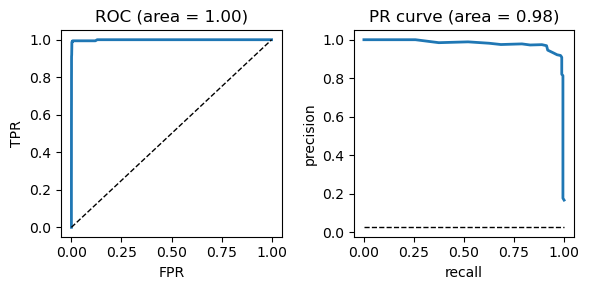

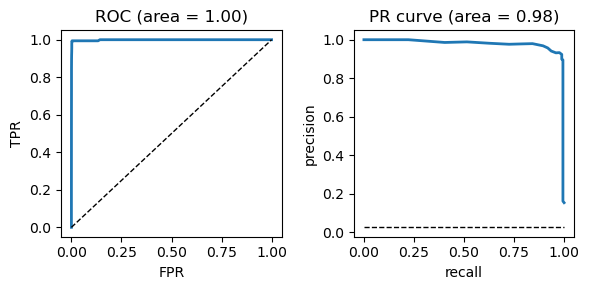

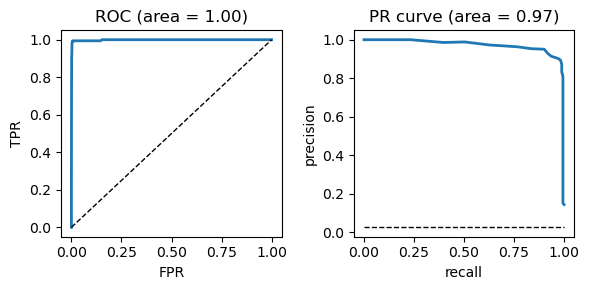

mkidney-ch
../results_knn2/mkidney-ch_
loading in real mtx


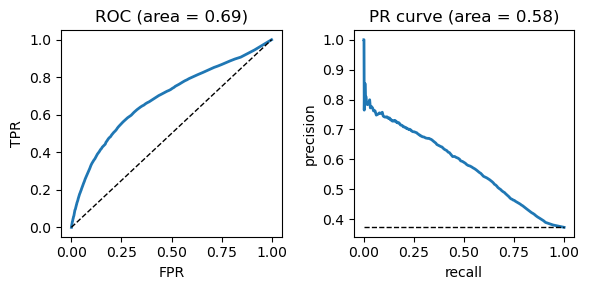

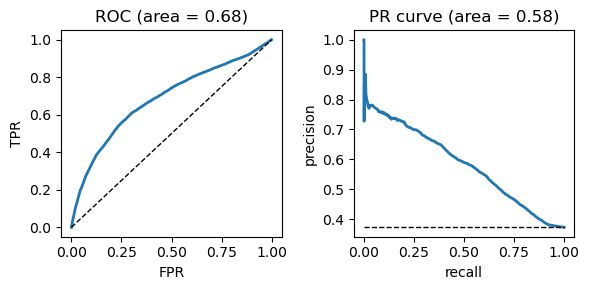

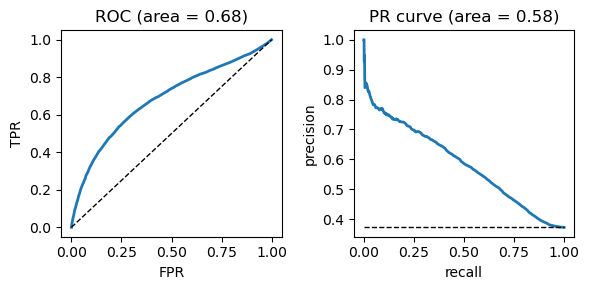

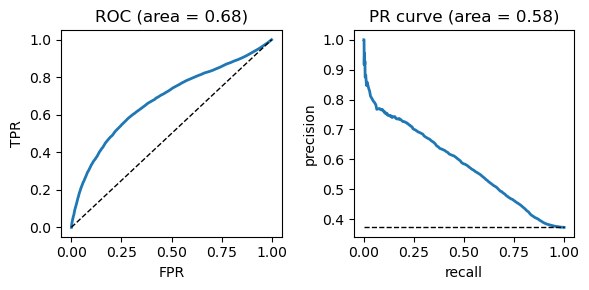

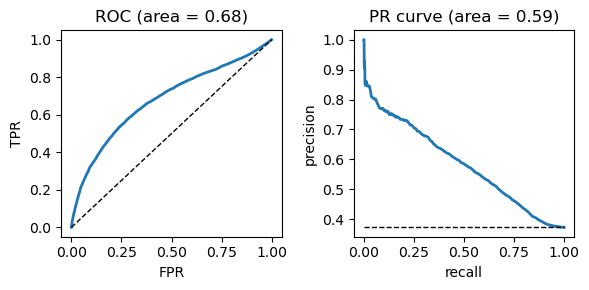

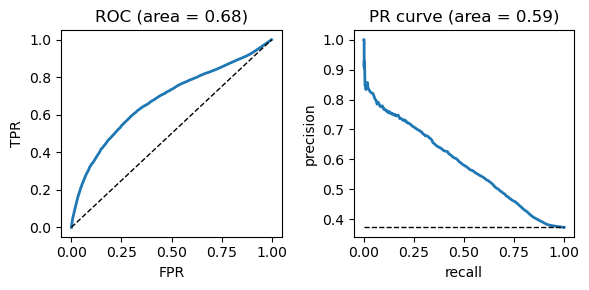

nuc-MULTI
../results_knn2/nuc-MULTI_
loading in real mtx


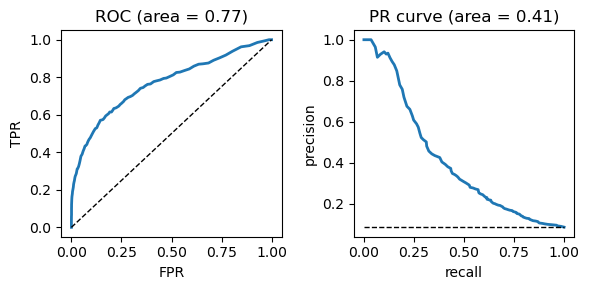

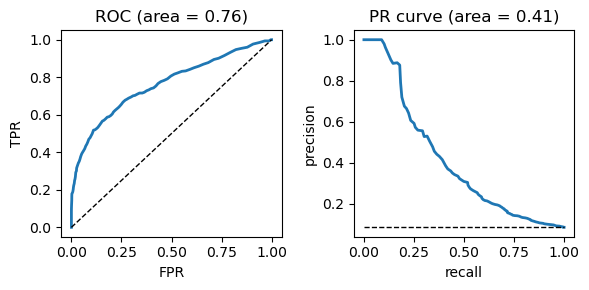

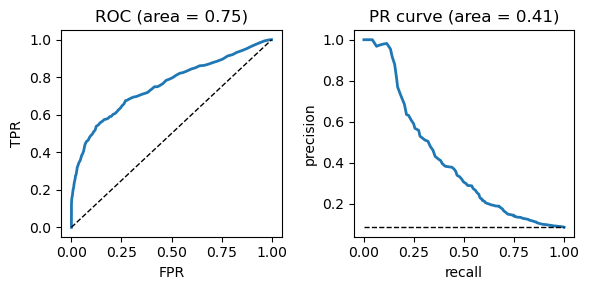

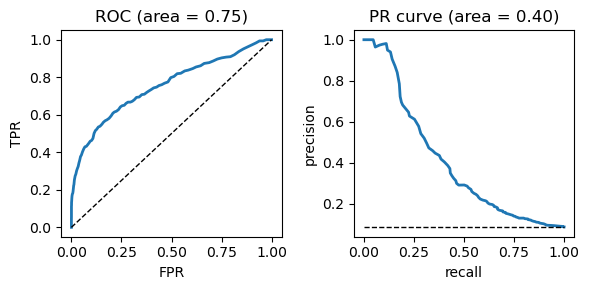

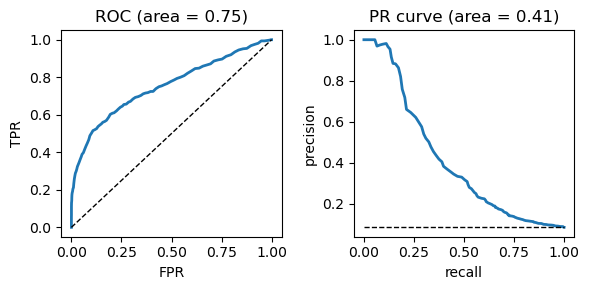

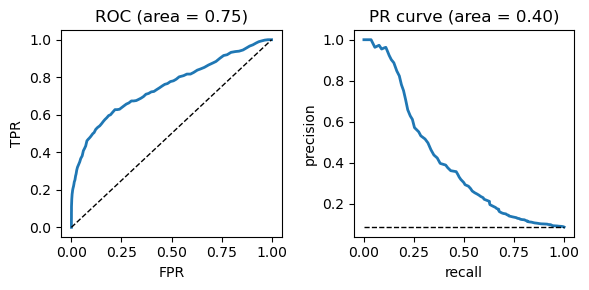

pbmc-1A-dm
../results_knn2/pbmc-1A-dm_
loading in real mtx


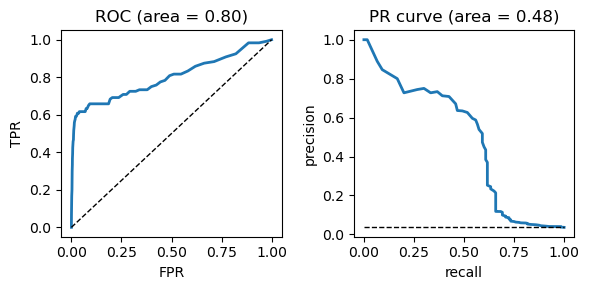

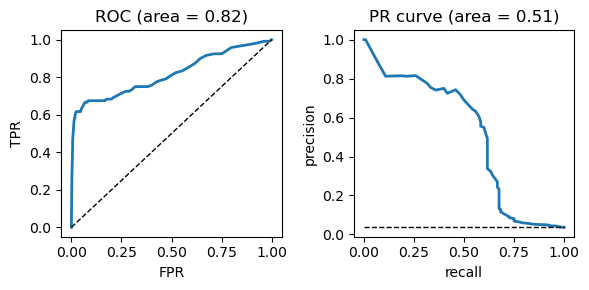

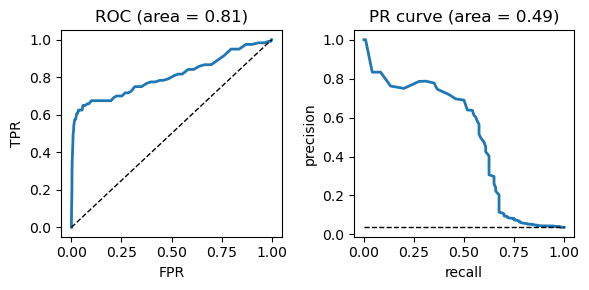

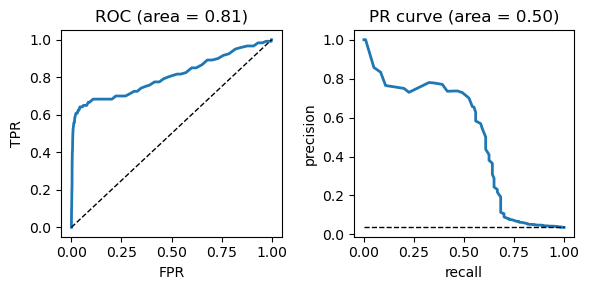

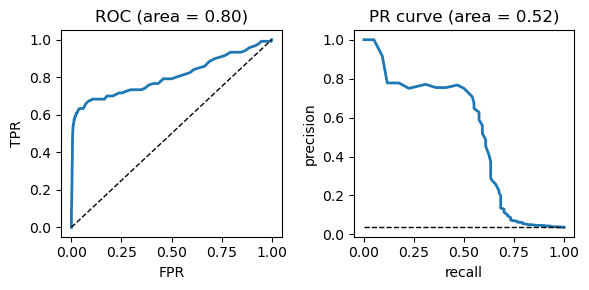

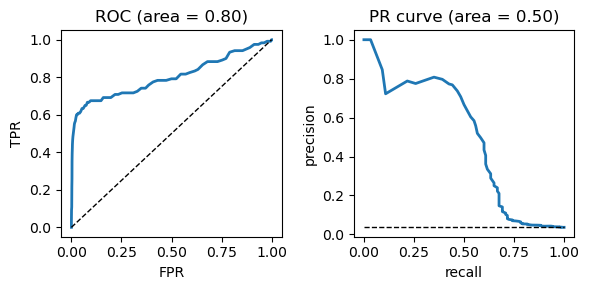

pbmc-1B-dm
../results_knn2/pbmc-1B-dm_
loading in real mtx


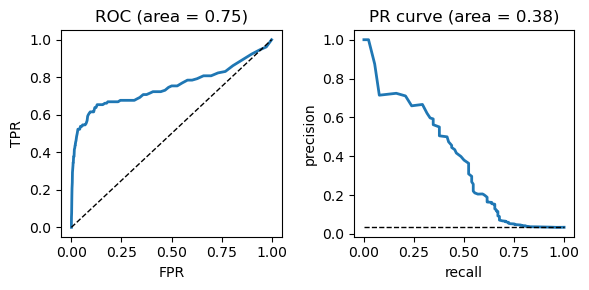

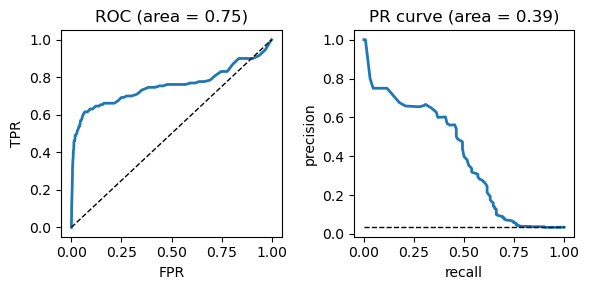

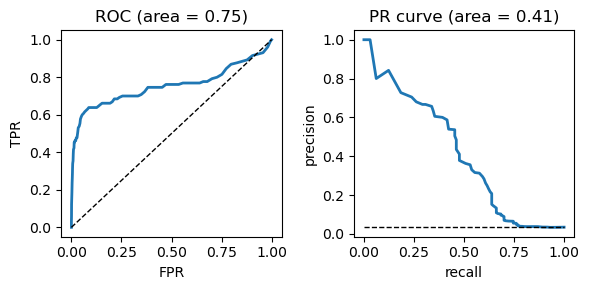

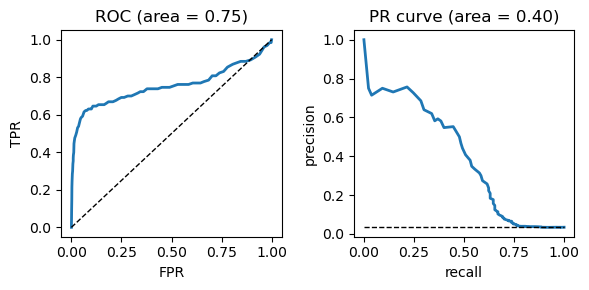

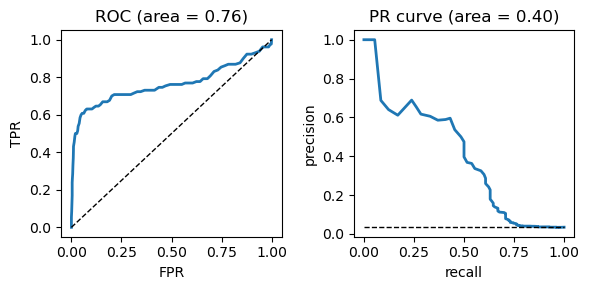

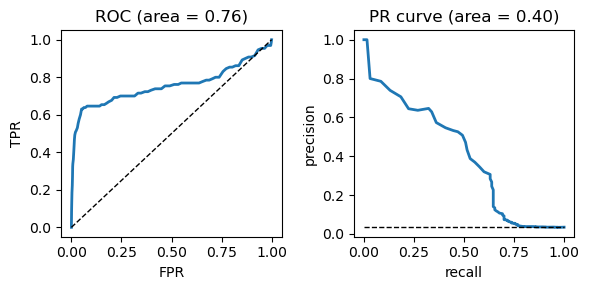

pbmc-1C-dm
../results_knn2/pbmc-1C-dm_
loading in real mtx


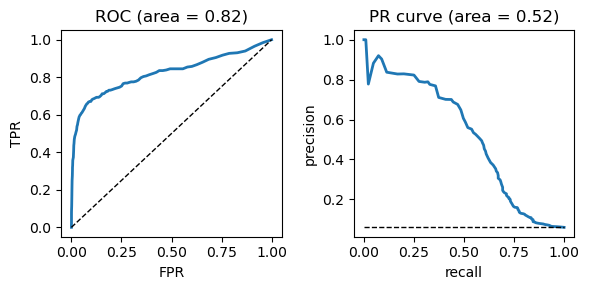

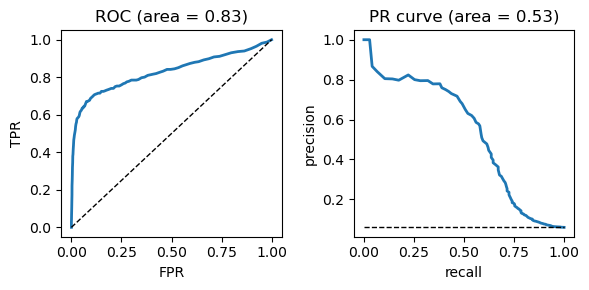

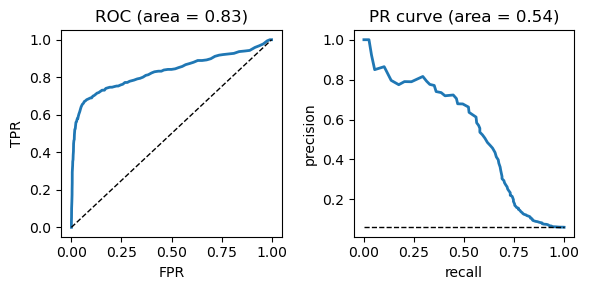

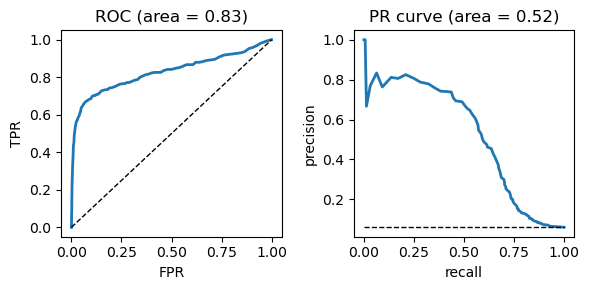

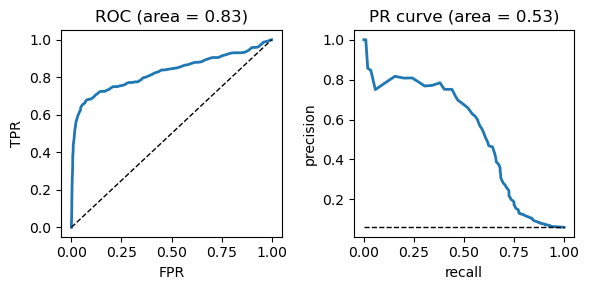

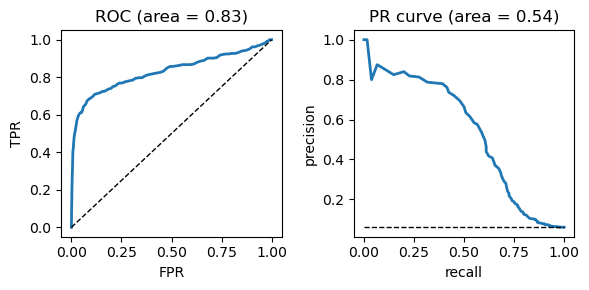

pbmc-2ctrl-dm
../results_knn2/pbmc-2ctrl-dm_
loading in real mtx


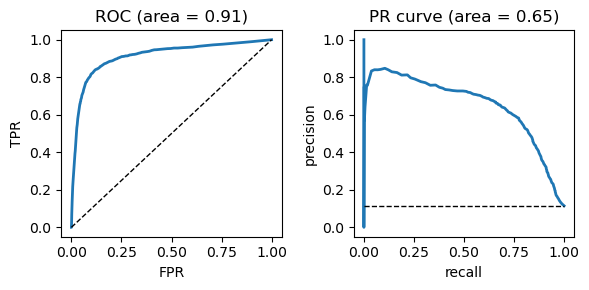

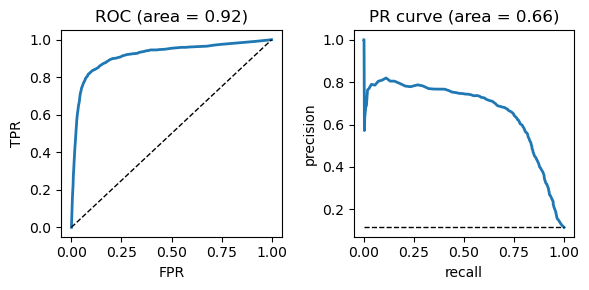

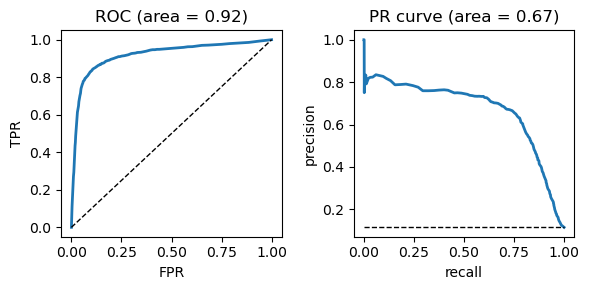

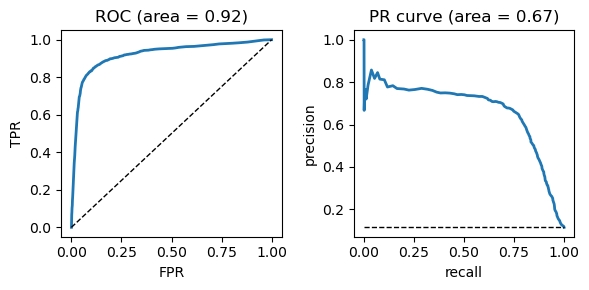

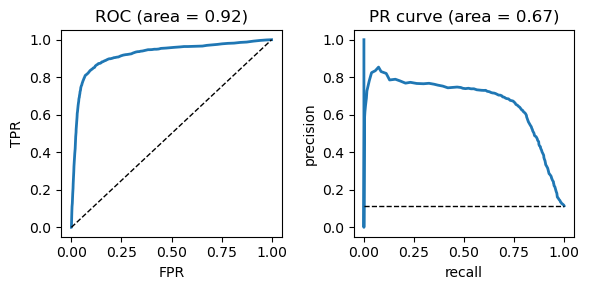

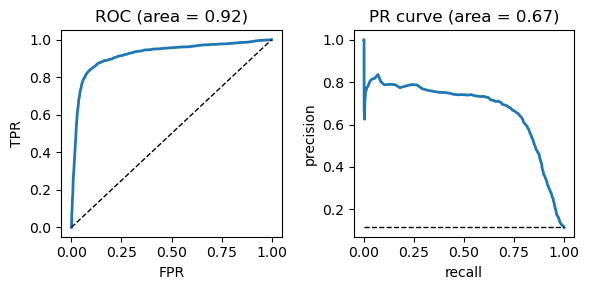

pbmc-2stim-dm
../results_knn2/pbmc-2stim-dm_
loading in real mtx


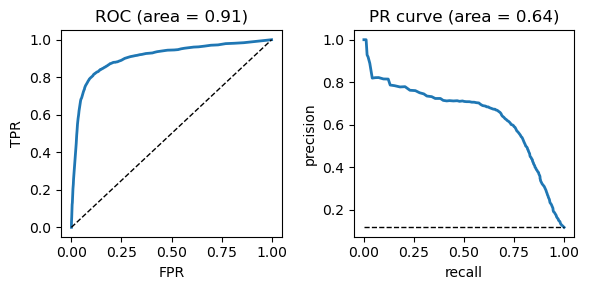

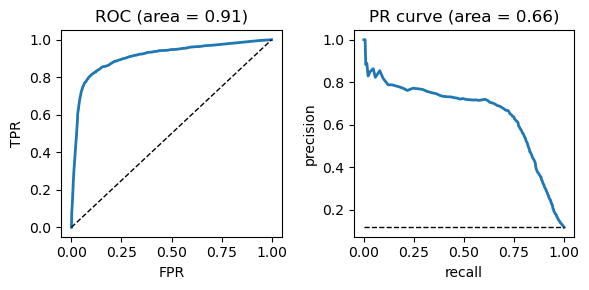

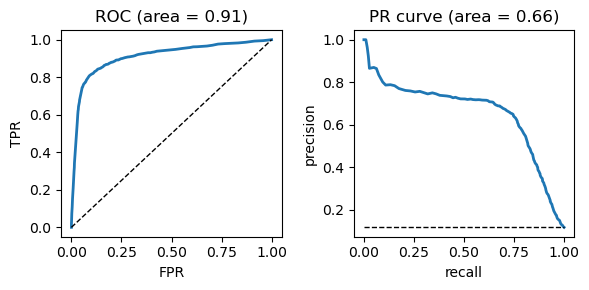

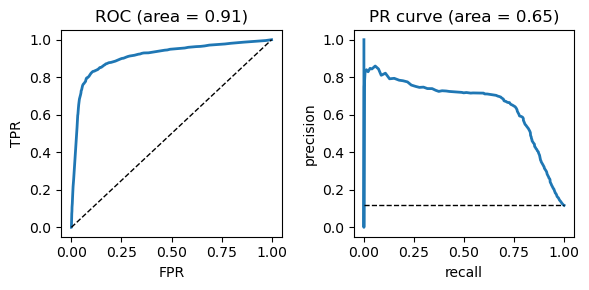

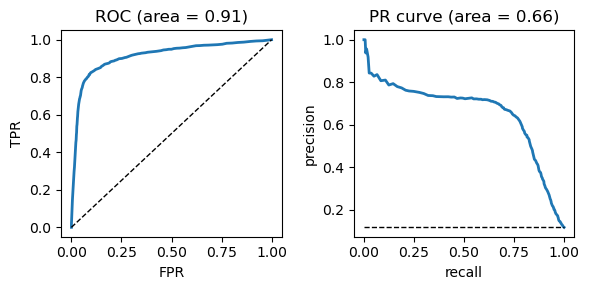

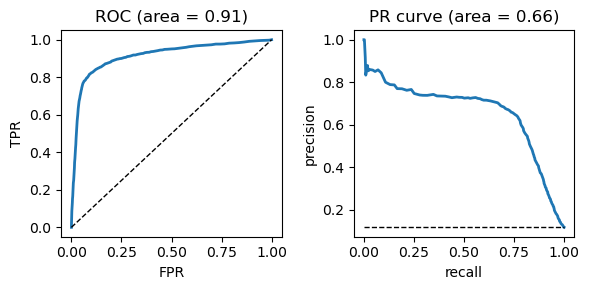

pbmc-ch
../results_knn2/pbmc-ch_
loading in real mtx


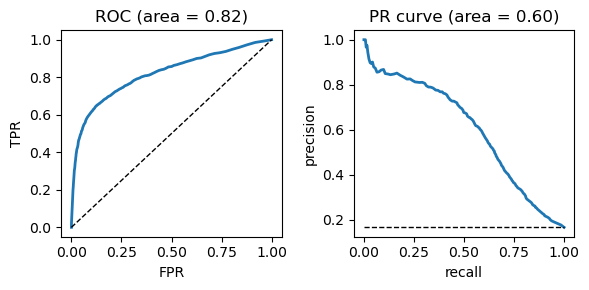

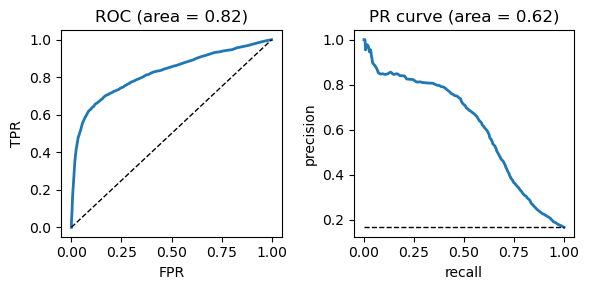

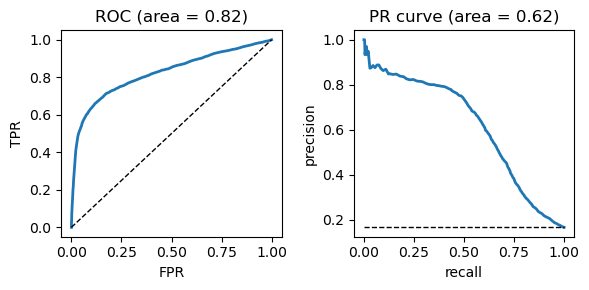

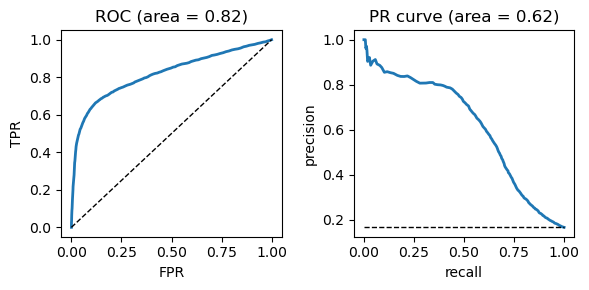

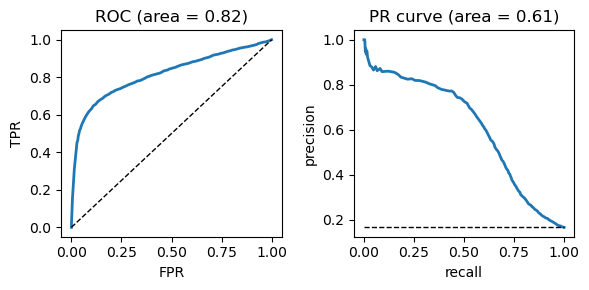

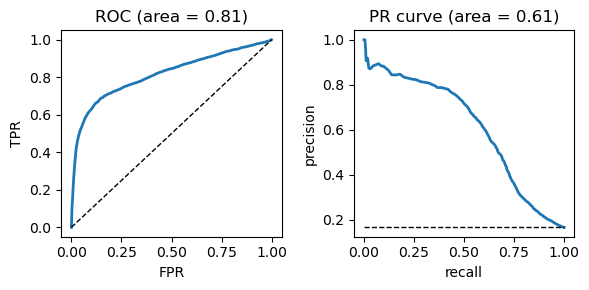

pdx-MULTI
../results_knn2/pdx-MULTI_
loading in real mtx


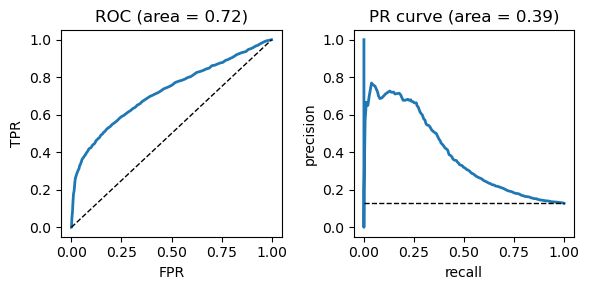

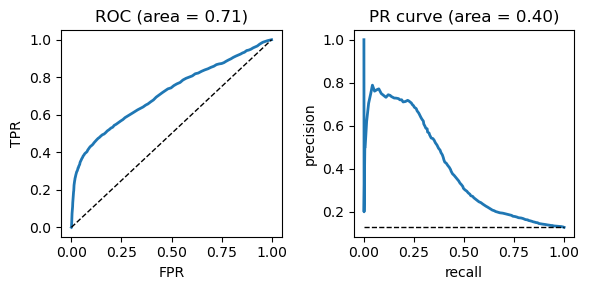

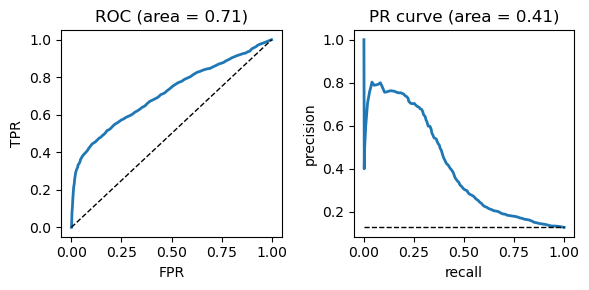

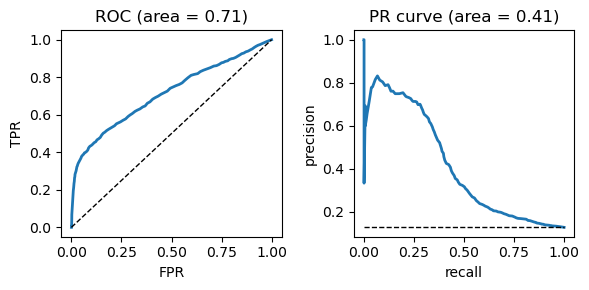

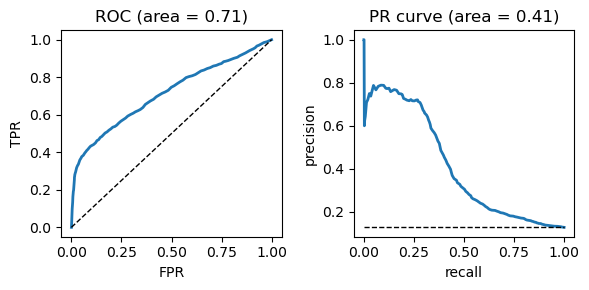

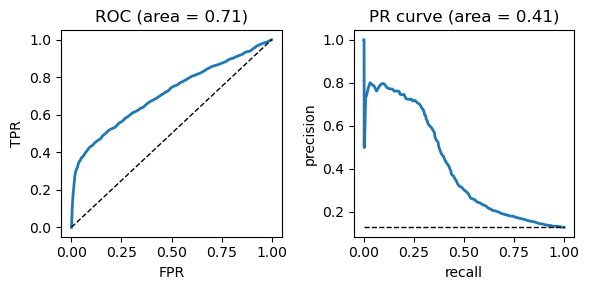

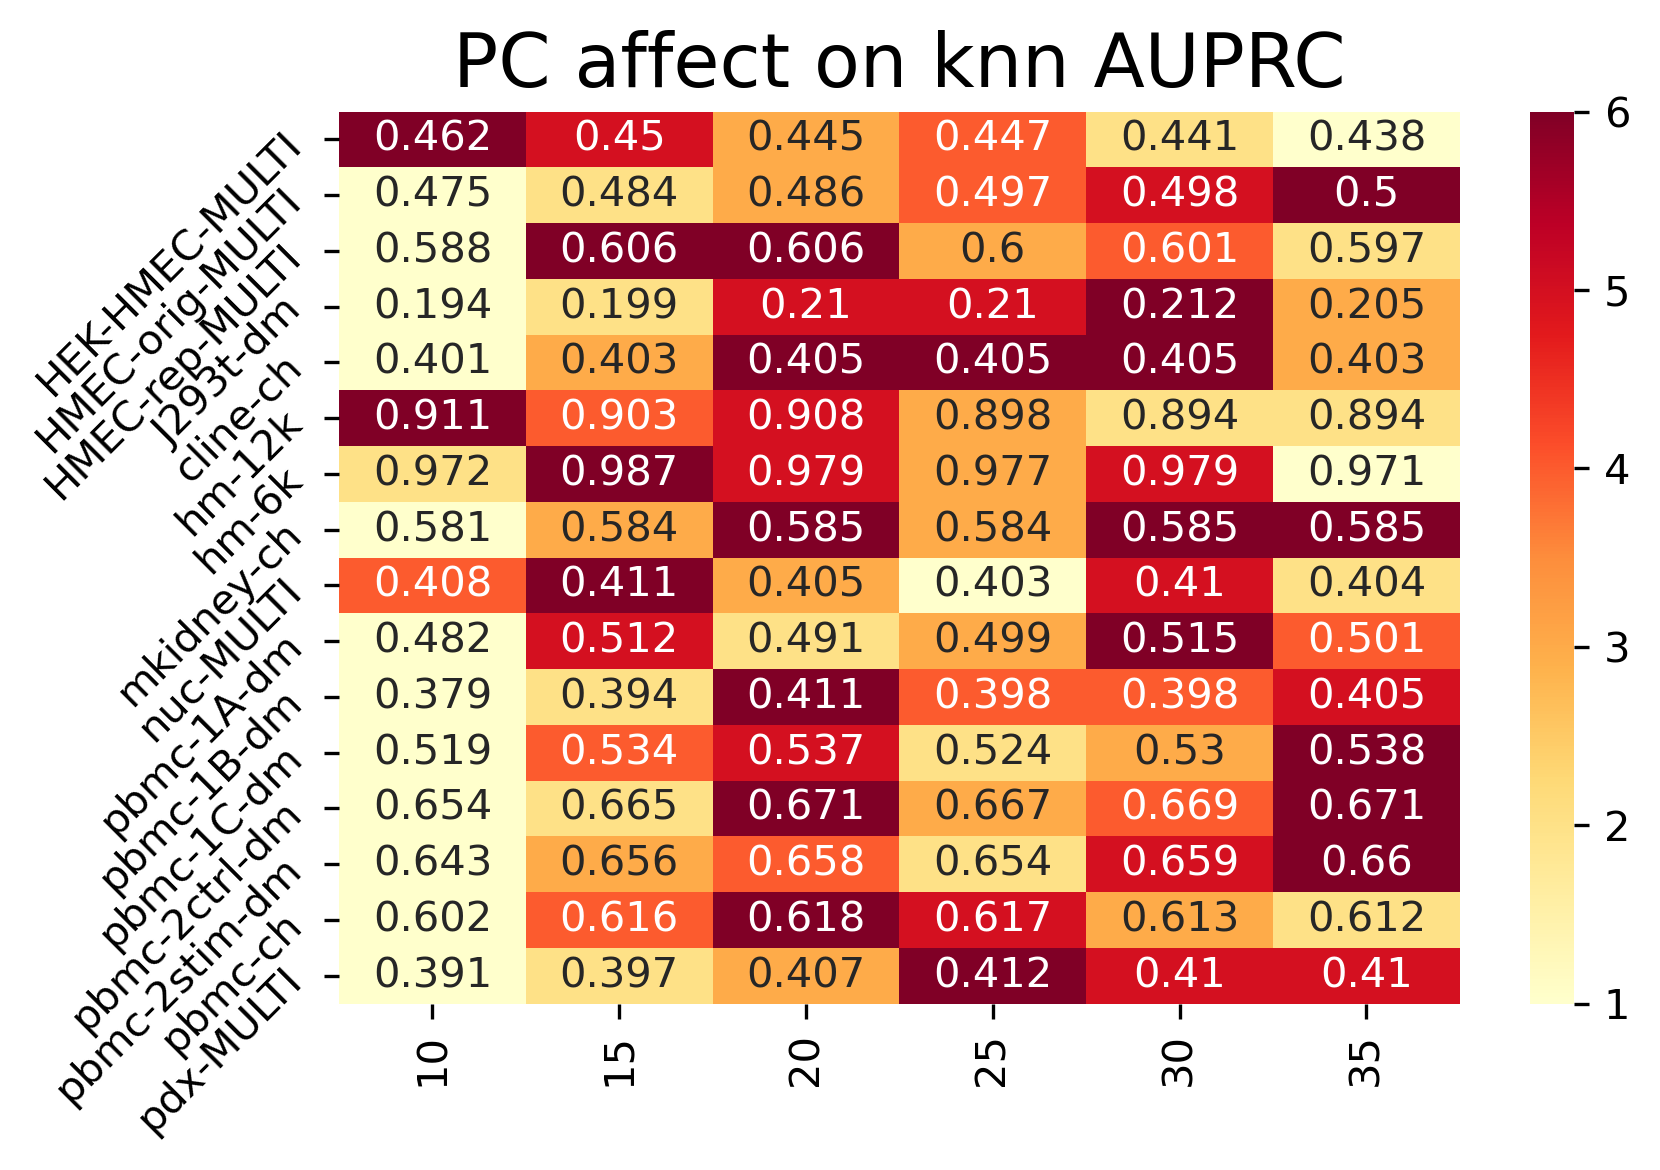

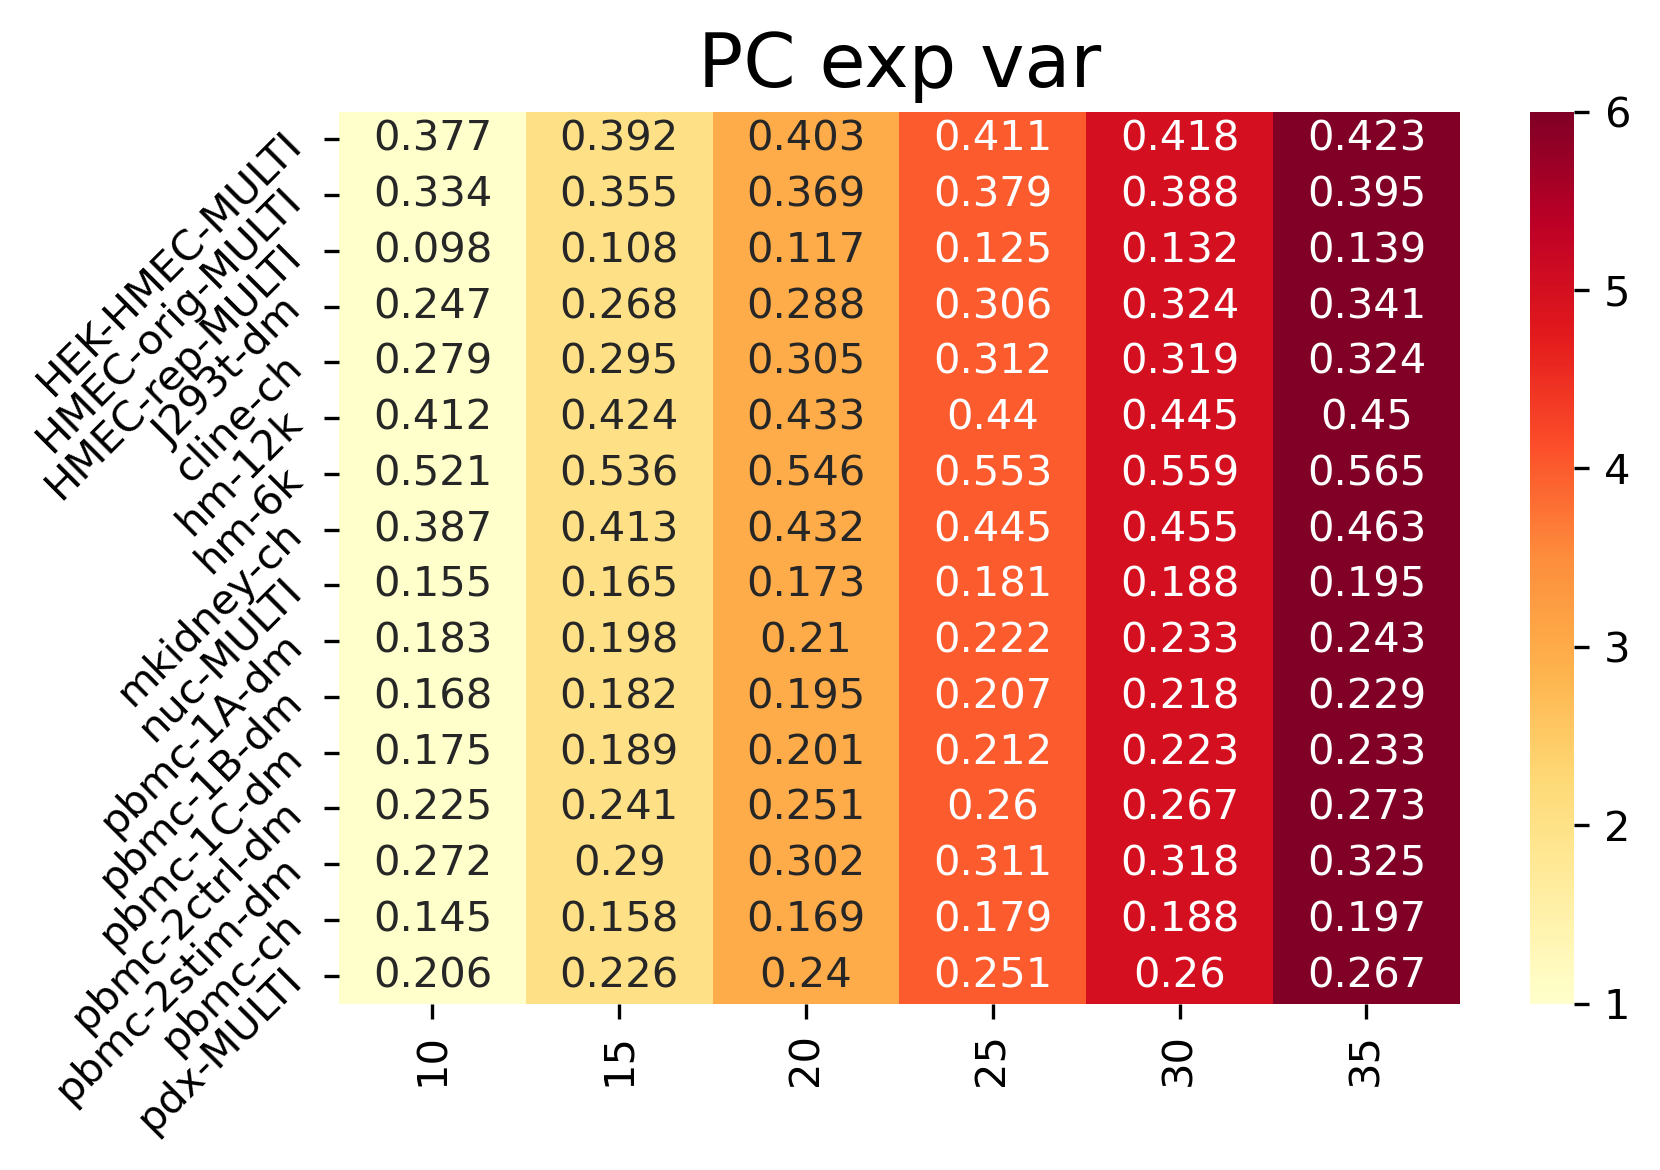

In [58]:
data_names = np.sort([f[:-19] for f in listdir(path) if (isfile(join(path, f)) & (f[-18:-4] == 'real_logcounts'))])
#data_names = data_names[3:5]
tmp1 = np.zeros((len(data_names), len(PCs)))
hm = pd.DataFrame(tmp1, index=np.sort(data_names), columns=PCs)

tmp2 = np.zeros((len(data_names), len(PCs)))
exp_var = pd.DataFrame(tmp2, index=np.sort(data_names), columns=PCs)

for file in files:
    
    data_name = file[:-19]
    print(data_name) 
    
    save_path = '../results_knn2' 
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    save_path = save_path + '/' + data_name + '_'
    print(save_path)

    real_path = '../data/mtx_files/' + data_name + '.mtx'
    ano_path  = '../data/mtx_files/' + data_name + '_anno.csv'
    
    #- READ IN DATA
    print('loading in real mtx')
    dat_real = mmread(real_path)
    Xr = scs.csr_matrix(dat_real).toarray().T
    
    #- READ IN BARCODE ANNOTATIONS
    ano = pd.read_csv(ano_path)
    true = pd.factorize(ano.x)[0]
    labels = ano.x
    if (labels[0]=='doublet'):
        tmp = true + 3
        tmp[tmp==3] = 1
        tmp[tmp==4] = 0
        true = tmp

    #- SIMULATE DOUBLETS
    Xs, ind1, ind2 = sim_inflate(Xr)

    Y = np.concatenate([np.zeros(Xr.shape[0]), np.ones(Xs.shape[0])])
    X = np.vstack([Xr,Xs])
    true = np.concatenate([true, np.full(Xs.shape[0],2)])
    labels = np.concatenate([labels, np.full(Xs.shape[0],'simulated')])
    
    #Filter genes
    thresh = np.floor(X.shape[0]/100)
    tmp    = np.sum((X>0), axis=0)>thresh
    X = X[:,tmp]
    
    #- HVGs    
    var = np.var(X, axis=0)
    np.random.seed(3900362577)
    hvgs = np.argpartition(var, -2000)[-2000:]  
        
    X = X[:,hvgs]

    #HYPERPARAMS
    neighbors = int(np.sqrt(X.shape[0]))
    projections = True
    save_figs = True
     
    #SCALING
    #X = np.log1p(X)
    X = np.log2(X+1)
    np.random.seed(42)
    scaler = StandardScaler().fit(X.T)
    np.random.seed(42)
    X = scaler.transform(X.T).T

    for comp in PCs:
        #KNN
        np.random.seed(42)
        pca = PCA(n_components=comp)
        pca_proj = pca.fit_transform(X)

        var = np.sum(pca.explained_variance_ratio_)
        
        np.random.seed(42)
        knn = NearestNeighbors(n_neighbors=neighbors)
        knn.fit(pca_proj,Y)
        graph = knn.kneighbors_graph(pca_proj)
        knn_feature = np.squeeze(np.array(np.sum(graph[:,Y==1], axis=1) / neighbors)) #sum across rows

        rauc, prauc, ap = get_dbl_metrics(true[true<2], knn_feature[true<2])
        plt.show()
        plt.close()
        hm[comp].loc[data_name] = prauc
        
        exp_var[comp].loc[data_name] = var
        
        
hm.to_csv(save_path + 'dataset_vs_PC.csv')

mk_heatmap(np.round(hm,3), title = 'PC affect on knn AUPRC')
plt.savefig(save_path + 'dataset_vs_PC.png', dpi=300)

exp_var.to_csv(save_path + 'dataset_vs_PC_exp_var.csv')

mk_heatmap(np.round(exp_var,3), title = 'PC exp var')
plt.savefig(save_path + 'dataset_vs_PC_exp_var.png', dpi=300)


*** using explained varience instead ***

In [38]:
Vs = np.arange(.20,.80,.05)
#Vs = [.15,.2]

data_dir = 'sce_normalized_data_inflate'
path = '../data/' + data_dir + '/'
files = [f for f in listdir(path) if (isfile(join(path, f)) & (f[-18:-4] == 'real_logcounts'))]
files = np.sort(files)
#files = files[3:5]
files

array(['HEK-HMEC-MULTI_real_logcounts.mtx',
       'HMEC-orig-MULTI_real_logcounts.mtx',
       'HMEC-rep-MULTI_real_logcounts.mtx', 'J293t-dm_real_logcounts.mtx',
       'cline-ch_real_logcounts.mtx', 'hm-12k_real_logcounts.mtx',
       'hm-6k_real_logcounts.mtx', 'mkidney-ch_real_logcounts.mtx',
       'nuc-MULTI_real_logcounts.mtx', 'pbmc-1A-dm_real_logcounts.mtx',
       'pbmc-1B-dm_real_logcounts.mtx', 'pbmc-1C-dm_real_logcounts.mtx',
       'pbmc-2ctrl-dm_real_logcounts.mtx',
       'pbmc-2stim-dm_real_logcounts.mtx', 'pbmc-ch_real_logcounts.mtx',
       'pdx-MULTI_real_logcounts.mtx'], dtype='<U34')

In [39]:
Vs

array([0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])

In [40]:
data_names = np.sort([f[:-19] for f in listdir(path) if (isfile(join(path, f)) & (f[-18:-4] == 'real_logcounts'))])
#data_names = data_names[3:5]

HEK-HMEC-MULTI
../results_knn2/HEK-HMEC-MULTI_
loading in real mtx


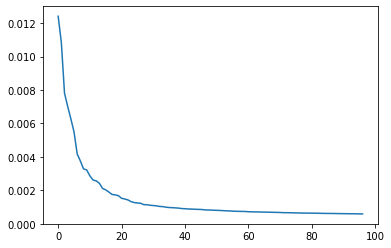

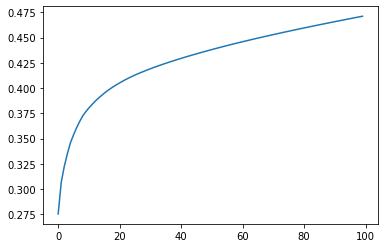

0
(21282, 2)
0.42197552251979065
0
(21282, 2)
0.42197552251979065
0
(21282, 2)
0.42197552251979065
1
(21282, 2)
0.42197552251979065
5
(21282, 6)
0.45480441243405423
17
(21282, 18)
0.44448776367573883
66
(21282, 67)
0.4263236486768305
99
(21282, 100)
0.41631535842475414
HMEC-orig-MULTI
../results_knn2/HMEC-orig-MULTI_
loading in real mtx


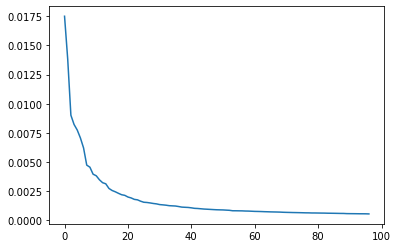

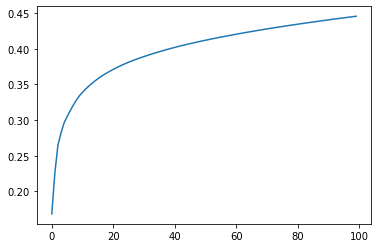

0
(52852, 2)
0.2656839161243678
1
(52852, 2)
0.2656839161243678
2
(52852, 3)
0.3493122977218351
4
(52852, 5)
0.44489225891010675
13
(52852, 14)
0.48547835896178587
38
(52852, 39)
0.5037558425810165
99
(52852, 100)
0.4914592401823047
99
(52852, 100)
0.4914592401823047
HMEC-rep-MULTI
../results_knn2/HMEC-rep-MULTI_
loading in real mtx


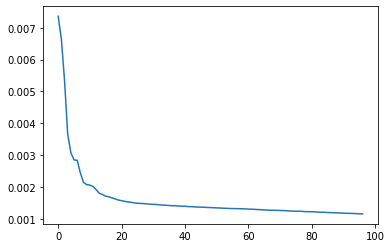

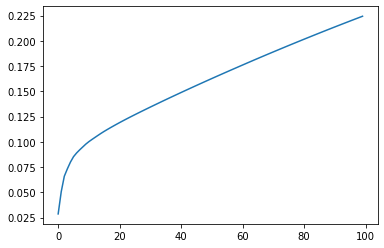

41
(21160, 42)
0.596021218431081
79
(21160, 80)
0.5807547521091224
99
(21160, 100)
0.5704402937060049
99
(21160, 100)
0.5704402937060049
99
(21160, 100)
0.5704402937060049
99
(21160, 100)
0.5704402937060049
99
(21160, 100)
0.5704402937060049
99
(21160, 100)
0.5704402937060049
J293t-dm
../results_knn2/J293t-dm_
loading in real mtx


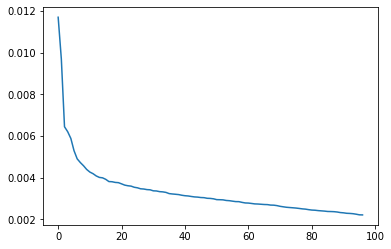

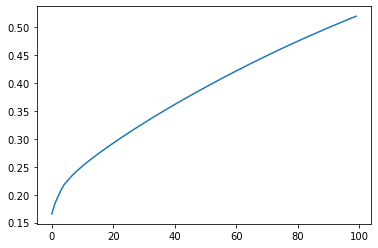

0
(1000, 2)
0.18732454370056373
2
(1000, 3)
0.2248825701377745
10
(1000, 11)
0.19447946690640763
22
(1000, 23)
0.21855988317704472
36
(1000, 37)
0.20224873134708002
53
(1000, 54)
0.21620662644003405
70
(1000, 71)
0.20857882714422504
91
(1000, 92)
0.20881029145216862
cline-ch
../results_knn2/cline-ch_
loading in real mtx


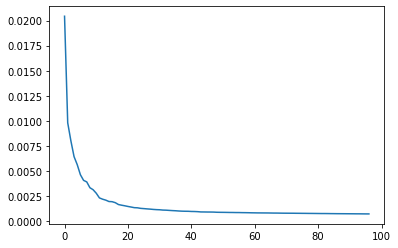

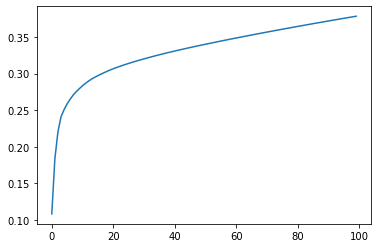

1
(15908, 2)
0.3202615264991038
1
(15908, 2)
0.3202615264991038
4
(15908, 5)
0.40064541000114684
16
(15908, 17)
0.4024252633487005
62
(15908, 63)
0.3972306237896795
99
(15908, 100)
0.38745426642484726
99
(15908, 100)
0.38745426642484726
99
(15908, 100)
0.38745426642484726
hm-12k
../results_knn2/hm-12k_
loading in real mtx


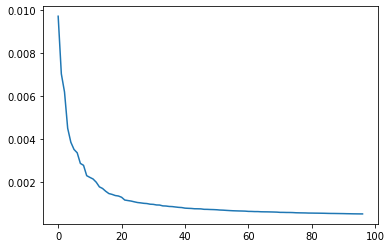

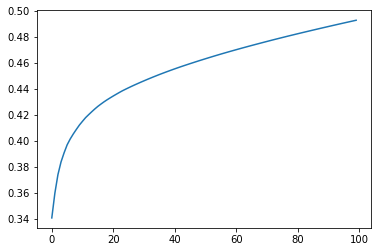

0
(25640, 2)
0.8542406259248507
0
(25640, 2)
0.8542406259248507
0
(25640, 2)
0.8542406259248507
0
(25640, 2)
0.8542406259248507
1
(25640, 2)
0.8542406259248507
6
(25640, 7)
0.9362078855664788
34
(25640, 35)
0.8940489431398866
99
(25640, 100)
0.8298181008120532
hm-6k
../results_knn2/hm-6k_
loading in real mtx


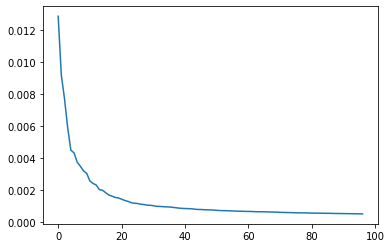

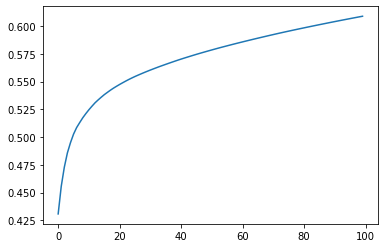

0
(13612, 2)
0.9633598275158413
0
(13612, 2)
0.9633598275158413
0
(13612, 2)
0.9633598275158413
0
(13612, 2)
0.9633598275158413
0
(13612, 2)
0.9633598275158413
0
(13612, 2)
0.9633598275158413
1
(13612, 2)
0.9633598275158413
5
(13612, 6)
0.9882185890051802
mkidney-ch
../results_knn2/mkidney-ch_
loading in real mtx


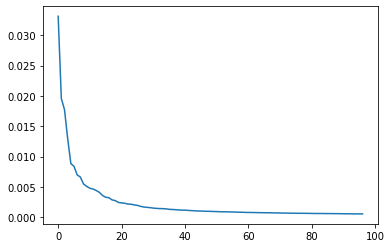

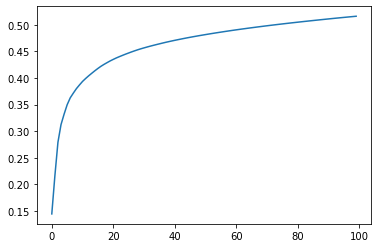

0
(42358, 2)
0.5198088189686736
1
(42358, 2)
0.5198088189686736
2
(42358, 3)
0.517361563805127
3
(42358, 4)
0.5186071976189534
5
(42358, 6)
0.5214740195623206
11
(42358, 12)
0.5826880904404006
27
(42358, 28)
0.5849686853950227
73
(42358, 74)
0.5825163144308503
nuc-MULTI
../results_knn2/nuc-MULTI_
loading in real mtx


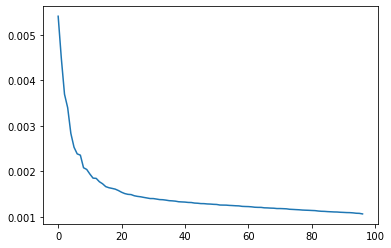

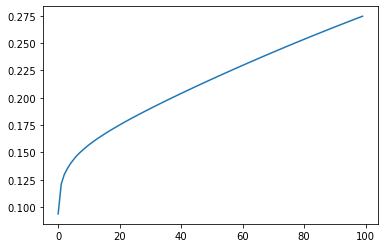

7
(11156, 8)
0.40382804360238295
37
(11156, 38)
0.4030829104008355
77
(11156, 78)
0.3772061454508744
99
(11156, 100)
0.37738407613184133
99
(11156, 100)
0.37738407613184133
99
(11156, 100)
0.37738407613184133
99
(11156, 100)
0.37738407613184133
99
(11156, 100)
0.37738407613184133
pbmc-1A-dm
../results_knn2/pbmc-1A-dm_
loading in real mtx


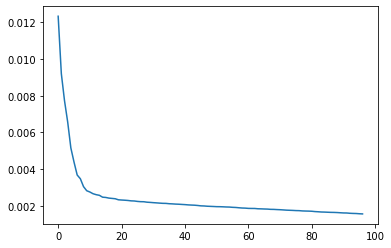

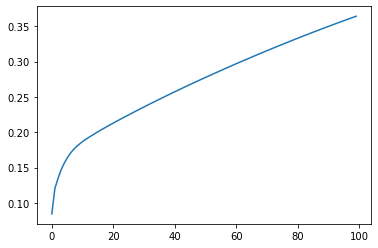

3
(6596, 4)
0.41408368472687346
15
(6596, 16)
0.5085580953793583
37
(6596, 38)
0.49971988165638925
62
(6596, 63)
0.47475933463452785
90
(6596, 91)
0.46373720160047366
99
(6596, 100)
0.45904558430544723
99
(6596, 100)
0.45904558430544723
99
(6596, 100)
0.45904558430544723
pbmc-1B-dm
../results_knn2/pbmc-1B-dm_
loading in real mtx


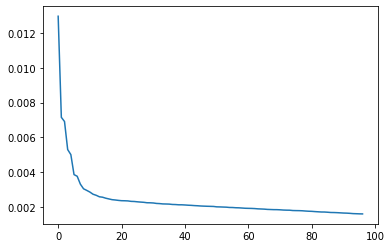

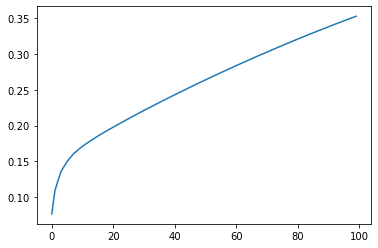

5
(7580, 6)
0.34360710208273293
21
(7580, 22)
0.3934227720400753
43
(7580, 44)
0.40271337746823976
68
(7580, 69)
0.36627621681729594
97
(7580, 98)
0.3248205000245177
99
(7580, 100)
0.3230122202600727
99
(7580, 100)
0.3230122202600727
99
(7580, 100)
0.3230122202600727
pbmc-1C-dm
../results_knn2/pbmc-1C-dm_
loading in real mtx


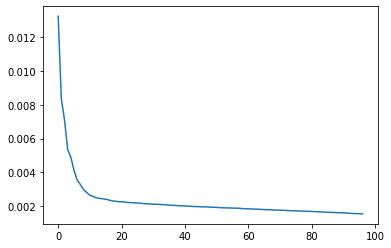

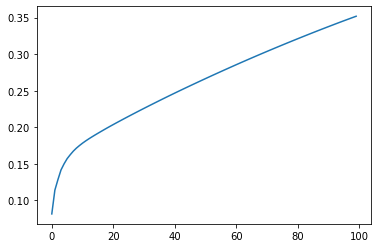

4
(10540, 5)
0.4530704602426887
18
(10540, 19)
0.5353253160271279
42
(10540, 43)
0.5311718107131423
68
(10540, 69)
0.5088924450838703
98
(10540, 99)
0.4834637941003914
99
(10540, 100)
0.48182719115915307
99
(10540, 100)
0.48182719115915307
99
(10540, 100)
0.48182719115915307
pbmc-2ctrl-dm
../results_knn2/pbmc-2ctrl-dm_
loading in real mtx


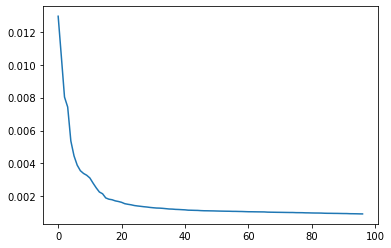

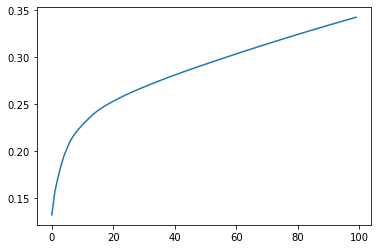

1
(27826, 2)
0.3516712156695126
5
(27826, 6)
0.6257123522899255
18
(27826, 19)
0.6656381284069219
57
(27826, 58)
0.6706183203249613
99
(27826, 100)
0.674790128839813
99
(27826, 100)
0.674790128839813
99
(27826, 100)
0.674790128839813
99
(27826, 100)
0.674790128839813
pbmc-2stim-dm
../results_knn2/pbmc-2stim-dm_
loading in real mtx


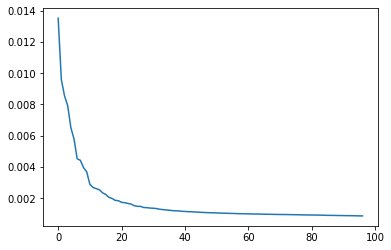

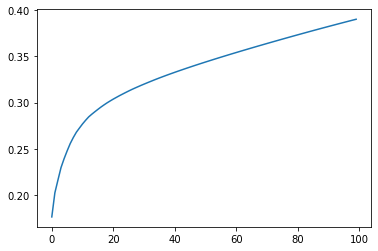

0
(27832, 2)
0.3420788803687316
1
(27832, 2)
0.3420788803687316
5
(27832, 6)
0.6119014559145847
18
(27832, 19)
0.6565183549606868
56
(27832, 57)
0.6682454553255757
99
(27832, 100)
0.6660342965728271
99
(27832, 100)
0.6660342965728271
99
(27832, 100)
0.6660342965728271
pbmc-ch
../results_knn2/pbmc-ch_
loading in real mtx


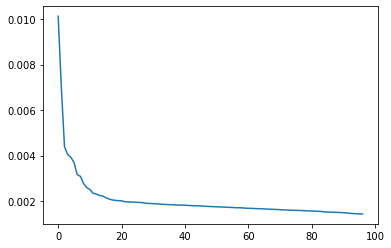

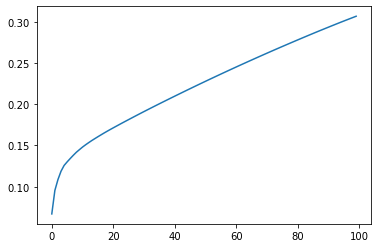

11
(30544, 12)
0.6158234570504262
35
(30544, 36)
0.610333198936669
63
(30544, 64)
0.5832804003762591
94
(30544, 95)
0.5342483280616486
99
(30544, 100)
0.526868722370867
99
(30544, 100)
0.526868722370867
99
(30544, 100)
0.526868722370867
99
(30544, 100)
0.526868722370867
pdx-MULTI
../results_knn2/pdx-MULTI_
loading in real mtx


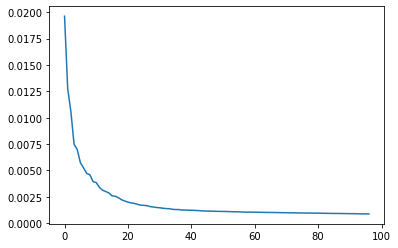

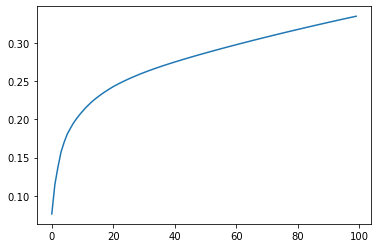

3
(20592, 4)
0.2911758704285904
8
(20592, 9)
0.38146721080134544
23
(20592, 24)
0.4111471745671528
62
(20592, 63)
0.408751094432341
99
(20592, 100)
0.4041280642930942
99
(20592, 100)
0.4041280642930942
99
(20592, 100)
0.4041280642930942
99
(20592, 100)
0.4041280642930942


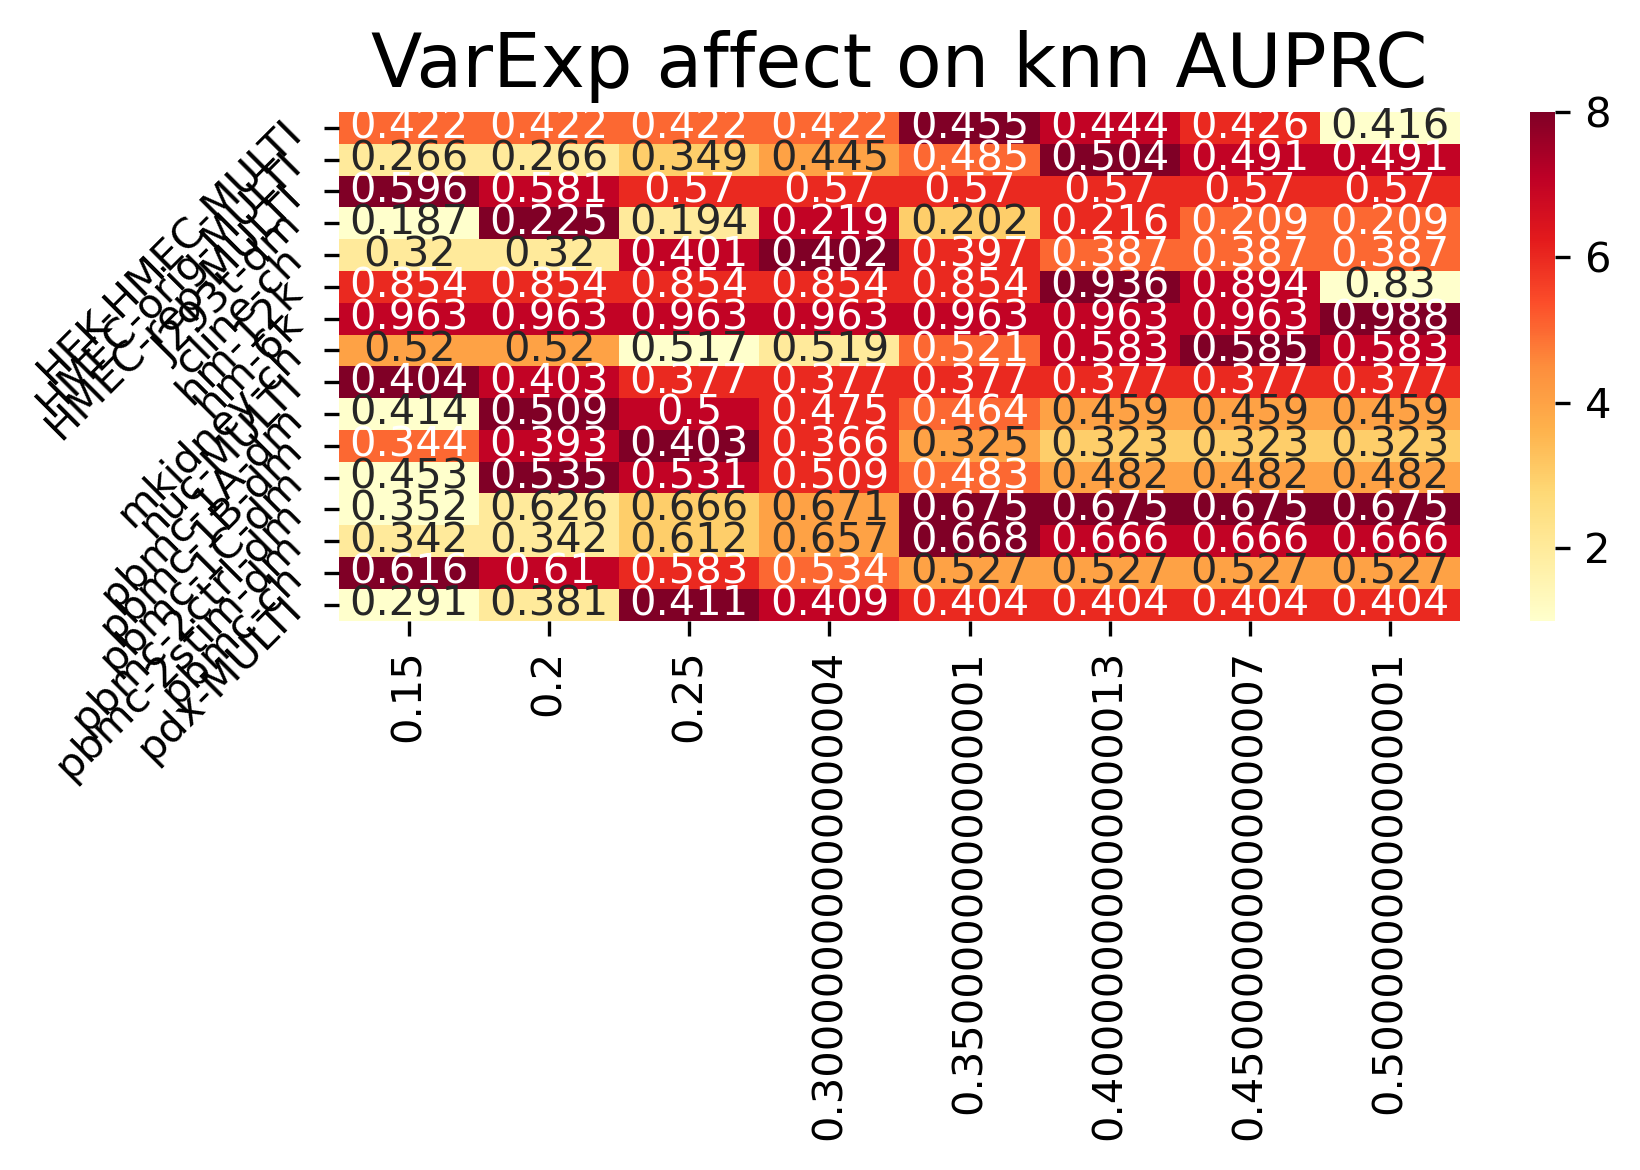

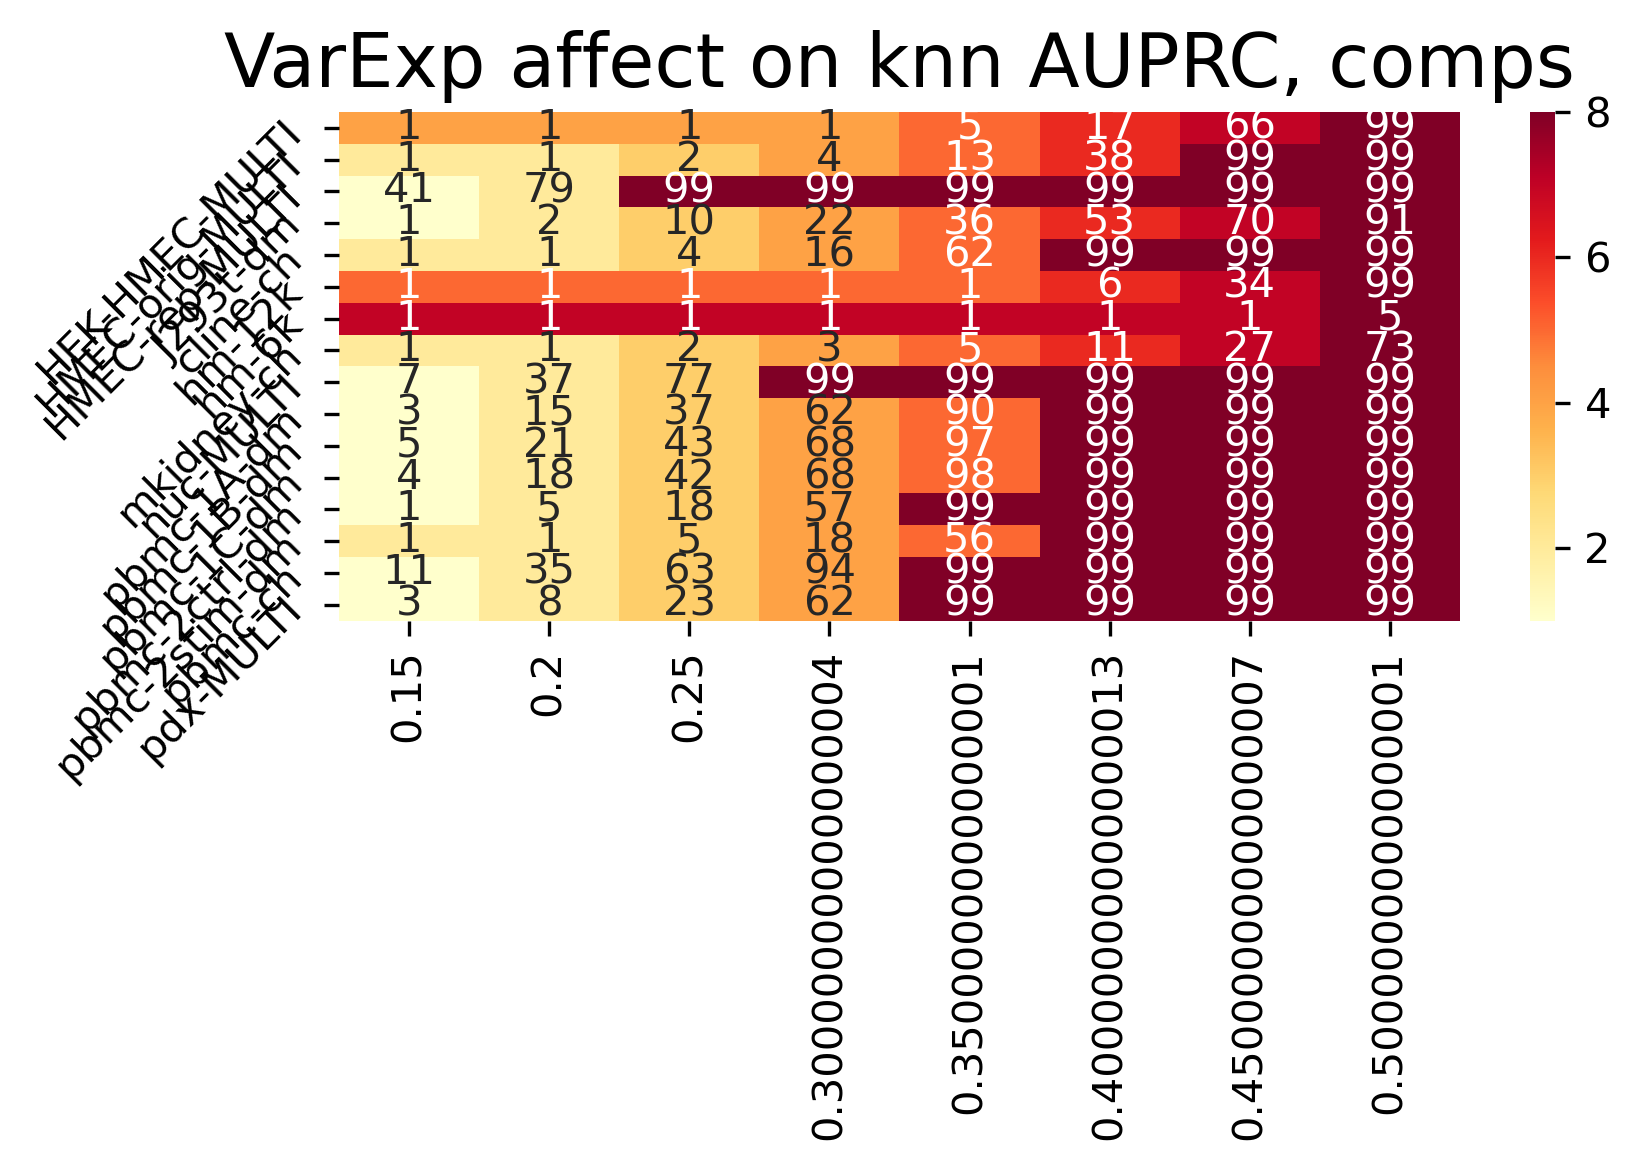

In [41]:

tmp1 = np.zeros((len(data_names), len(Vs)))
hm = pd.DataFrame(tmp1, index=np.sort(data_names), columns=Vs)

tmp2 = np.zeros((len(data_names), len(Vs)))
comps = pd.DataFrame(tmp2, index=np.sort(data_names), columns=Vs)

for file in files:
    
    data_name = file[:-19]
    print(data_name) 
    
    save_path = '../results_knn2' 
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    save_path = save_path + '/' + data_name + '_'
    print(save_path)

    real_path = '../data/mtx_files/' + data_name + '.mtx'
    ano_path  = '../data/mtx_files/' + data_name + '_anno.csv'
    
    #- READ IN DATA
    print('loading in real mtx')
    dat_real = mmread(real_path)
    Xr = scs.csr_matrix(dat_real).toarray().T
    
    #- READ IN BARCODE ANNOTATIONS
    ano = pd.read_csv(ano_path)
    true = pd.factorize(ano.x)[0]
    labels = ano.x
    if (labels[0]=='doublet'):
        tmp = true + 3
        tmp[tmp==3] = 1
        tmp[tmp==4] = 0
        true = tmp

    #- SIMULATE DOUBLETS
    Xs, ind1, ind2 = sim_inflate(Xr)

    Y = np.concatenate([np.zeros(Xr.shape[0]), np.ones(Xs.shape[0])])
    X = np.vstack([Xr,Xs])
    true = np.concatenate([true, np.full(Xs.shape[0],2)])
    labels = np.concatenate([labels, np.full(Xs.shape[0],'simulated')])
    
    #Filter genes
    thresh = np.floor(X.shape[0]/100)
    tmp    = np.sum((X>0), axis=0)>thresh
    X = X[:,tmp]
    
    #- HVGs    
    var = np.var(X, axis=0)
    np.random.seed(3900362577)
    hvgs = np.argpartition(var, -2000)[-2000:]  
        
    X = X[:,hvgs]

    #HYPERPARAMS
    neighbors = int(np.sqrt(X.shape[0]))
    projections = True
    save_figs = True
     
    #SCALING
    #X = np.log1p(X)
    X = np.log2(X+1)
    np.random.seed(42)
    scaler = StandardScaler().fit(X.T)
    np.random.seed(42)
    X = scaler.transform(X.T).T

    np.random.seed(42)
    pca = PCA(n_components=100)
    full_pca_proj = pca.fit_transform(X)

    full_var = pca.explained_variance_ratio_

    plt.plot(np.arange(len(full_var[3:])), full_var[3:])
    plt.show()
    plt.close()
    
    s=0
    sum_var=[]
    for e in full_var:
            s += e
            sum_var.append(s)

    plt.plot(np.arange(len(sum_var)), sum_var)
    plt.show()
    plt.close()
    
    for exp in Vs:
        #KNN
        comp = np.argmin(np.abs(np.array(sum_var) - exp))
        print(comp)
        
        if(comp<9):
            comp=9
            
        pca_proj = full_pca_proj[:,:comp+1]
        print(pca_proj.shape)
        
        np.random.seed(42)
        knn = NearestNeighbors(n_neighbors=neighbors)
        knn.fit(pca_proj,Y)
        graph = knn.kneighbors_graph(pca_proj)
        knn_feature = np.squeeze(np.array(np.sum(graph[:,Y==1], axis=1) / neighbors)) #sum across rows

        rauc, prauc, ap = get_dbl_metrics(true[true<2], knn_feature[true<2])
        #plt.show()
        plt.close()
        print(prauc)
        hm[exp].loc[data_name] = prauc    
        comps[exp].loc[data_name] = comp    
        
hm.to_csv(save_path + 'dataset_vs_VarExp.csv')

mk_heatmap(np.round(hm,3), title = 'VarExp affect on knn AUPRC')
plt.savefig(save_path + 'dataset_vs_VarExp.png', dpi=300)

comps.to_csv(save_path + 'dataset_vs_VarExp_comps.csv')

mk_heatmap(comps, title = 'VarExp affect on knn AUPRC, comps')
plt.savefig(save_path + 'dataset_vs_VarExp_comps.png', dpi=300)


In [43]:
hm.sum()/16

0.15    0.459001
0.20    0.496934
0.25    0.522162
0.30    0.524497
0.35    0.523295
0.40    0.532356
0.45    0.527483
0.50    0.524258
dtype: float64

In [45]:
hm2 = pd.read_csv(save_path + 'dataset_vs_PC.csv')

In [58]:
hm2.sum(axis=0)[1:]/16

10    0.541479
15    0.549971
20    0.551294
25    0.549572
30    0.551253
35    0.549612
dtype: object

In [29]:
data_dir = 'sce_normalized_data_inflate'

save_path = '../results_knn/' + data_dir +'/'
hm1 = pd.read_csv(save_path + 'dataset_vs_PC_Log2ScaleCell_hvg.csv')
hm2 = pd.read_csv(save_path + 'dataset_vs_HVGmethod3.csv')

<BarContainer object of 6 artists>

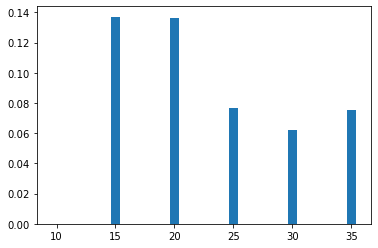

In [30]:
t =  hm1.sum().to_numpy()[1:]
t = t - np.min(t)
plt.bar(np.arange(10,40,5),t)

In [32]:
hm1.sum().to_numpy()[1:]

array([8.705930573749153, 8.843018563414198, 8.842037384266357,
       8.782628099283471, 8.76775044920073, 8.781394845831777],
      dtype=object)

In [31]:
t

array([0.0, 0.13708798966504432, 0.1361068105172034, 0.07669752553431763,
       0.06181987545157597, 0.0754642720826233], dtype=object)

In [27]:
hm2.columns[1:]

Index(['old', 'seuv3', 'hvg', 'heg', 'hvg_heg'], dtype='object')

<BarContainer object of 5 artists>

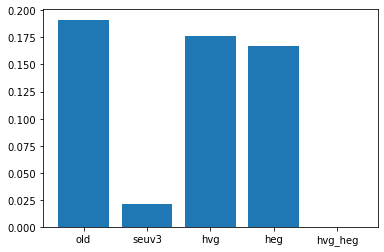

In [28]:
t =  hm2.sum().to_numpy()[1:]
t = t - np.min(t)
plt.bar(hm2.columns[1:],t)

In [10]:
knn_feature

array([0.20625, 0.     , 0.06875, ..., 0.9125 , 0.65625, 0.925  ])

In [11]:
knn_feature

array([0.20625, 0.     , 0.06875, ..., 0.9125 , 0.65625, 0.925  ])

In [12]:
knn_feature

array([0.20625, 0.     , 0.06875, ..., 0.9125 , 0.65625, 0.925  ])

In [4]:
np.random.get_state()

('MT19937',
 array([2147483648, 3683427523,  660907108, 2125898956, 1101215812,
        2325317878, 1477216604, 3510757803, 1510495919,  212876095,
         583244067, 3489567460, 3589098058, 4161245864,  804206815,
        1742192221, 1307385738, 1563292386,  571558481,  807258279,
          14979075,   87873491, 3606904684,  193114280,  936772721,
        3041168715, 2181229090, 1908157158, 2057960462, 2868112092,
        1559393410, 4249480835, 2187944718, 3253058218, 1746363543,
         968464451, 3805340983, 4093172631, 1069096297,  914755308,
        3311501254, 1575292522, 3856097463, 1326218134, 1391820626,
        3159944439, 3574672801, 2345708250,  790632263, 1669761097,
        1877204515, 2366115122, 3544729007, 3840498694,  630570629,
        2387875070,  709948407,  854943482,  751308136, 2923543707,
         562318627,  454625078, 1252713306,   81487761, 1602228455,
        3803341821, 2033979196, 2311536829, 2908815494, 4034753554,
         457469716, 3712838311, 1393

In [5]:
np.random.get_state()

('MT19937',
 array([  18801293, 3963303592,  877172685, 2015485737, 4281864420,
         359549668,   14073512, 1560516427,  913229968, 2637278278,
        2943378995, 2090416247,  306154192, 1358789471, 1362789158,
        3364732799, 2429938508, 1414986348,  569184964, 2301318560,
        3068700728, 3830503256, 1540137382, 3426642996,  683764561,
        1917739265, 1565688683, 3265948642, 4062205995, 3121936622,
        1438986615, 3616807937, 2168736619, 1342940497,  929783039,
        4190236757, 1146227689,  313035553, 2247870418, 2812347033,
         791972431,  453808246, 1010500575, 3903653887, 3711954429,
        3869509522, 2682106701, 2217157210, 3676362898, 3047595242,
        2116314392, 1300333276, 2756495695, 3701527141, 2251131761,
        4076488994, 2503284680, 2504502249,  723689601, 1630637831,
        3410808574, 1340341185, 3751966642,  927562848, 2038990270,
        2073425507, 3708901868, 2110397152,   27250735, 2896190039,
         462168260,  121334563, 1809

In [6]:
np.sort(hvgs)

array([    0,     1,     2, ..., 11742, 11755, 11780])